In [2]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import HTML

## Our first neurons
We will start by creating a simple neuron that takes three inputs and produces one output. The inputs are fed into the neuron, and the output is calculated using the following formula:

$$
output = \sum_i w_i * x_i + b
$$

where $w_i$ is the weight of the $i$ th input, $x_i$ is the value of the $i$ th input, and $b$ is the bias.

<p>The neuron would look as following, note that the weights are associated with each input line. There is only one bias for the neuron:</p>
<svg> <circle cx="100" cy="80" r="20" stroke="black" stroke-width="3" fill="white" />
<line x1="0" y1="30" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="80" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="130" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="180" y1="80" x2="120" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
</svg>

In [3]:
inputs=[1,2,3]
weights=[0.2,0.8,-0.5]
bias=2

output=inputs[0]*weights[0]+inputs[1]*weights[1]+inputs[2]*weights[2]+bias
# This is the same as: (1*0.2) + (2*0.8) + (3*-0.5) + 2
print(output)

2.3


Now we add a fourth input, $x_4$ with a weight of $w_4$. This would result in the following:

<svg> <circle cx="100" cy="80" r="20" stroke="black" stroke-width="3" fill="white" />
<line x1="0" y1="30" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="60" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="100" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="130" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="180" y1="80" x2="120" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
</svg>

In [4]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias

print(output)

4.8


## A layer of neurons
Now we will create a layer of neurons. A layer of neurons is a collection of neurons that all take the same inputs. The layer will have three neurons, and each neuron will have four inputs. The layer will produce three outputs, one for each neuron.

<p>The layer would look as following:</p>
<svg width="300" height="400"> 
<circle cx="100" cy="80" r="20" stroke="black" stroke-width="3" fill="white" />
<circle cx="100" cy="180" r="20" stroke="black" stroke-width="3" fill="white" />
<circle cx="100" cy="280" r="20" stroke="black" stroke-width="3" fill="white" />
<line x1="0" y1="50" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="130" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="230" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="330" x2="80" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="50" x2="80" y2="180" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="130" x2="80" y2="180" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="230" x2="80" y2="180" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="330" x2="80" y2="180" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="50" x2="80" y2="280" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="130" x2="80" y2="280" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="230" x2="80" y2="280" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="0" y1="330" x2="80" y2="280" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="180" y1="80" x2="120" y2="80" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="180" y1="180" x2="120" y2="180" style="stroke:rgb(0,0,0);stroke-width:2" />
<line x1="180" y1="280" x2="120" y2="280" style="stroke:rgb(0,0,0);stroke-width:2" />
</svg>


In [5]:
inputs = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]
bias1 = 2
bias2 = 3
bias3 = 0.5

output = [
    inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
    inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
    inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3
]

print(f"The output for the neurons are: {output}")

The output for the neurons are: [4.8, 1.21, 2.385]


This is not really scalable, so we will first simplify the calculations.

In [6]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

output = []
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight
    neuron_output += neuron_bias
    output.append(neuron_output)

print(f"The output for the neurons are: {output}")

The output for the neurons are: [4.8, 1.21, 2.385]


This is not that efficient, so we will use a matrix multiplication instead. For this we will need dot products. The dot product of two vectors is the sum of the products of the corresponding elements of the two vectors. For example:

$$
a = [1, 2, 3]\\
b = [4, 5, 6]
$$

$$
a \cdot b = 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 32
$$

This is very reminiscent of the formula we used for a single neuron. We can use the same formula for a layer of neurons. We will use the following notation:

$$
\mathbf{X} = \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{bmatrix}
$$

$$
\mathbf{W} = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33} \\
w_{41} & w_{42} & w_{43}
\end{bmatrix}
$$

$$
\mathbf{b} = \begin{bmatrix}
b_1 \\
b_2 \\
b_3
\end{bmatrix}
$$

The output can now be calculated using the following formula:

$$
\mathbf{Y} = \mathbf{X}^T \mathbf{W} + \mathbf{b}
$$

Note the $^T$ after $\mathbf{X}$. This is the transpose of the matrix $\mathbf{X}$. The transpose of a matrix is the matrix with the rows and columns swapped. For example:	 $$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}^T = \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix}$$


## NumPy implementation
We will now implement the layer of neurons using NumPy. This will make our code easier to read and more efficient.

Let's start with a neuron.

In [7]:
inputs = [1, 2, 3, 2.5]
weights = [0.2, 0.8, -0.5, 1.0]
bias = 2

output = np.dot(weights, inputs) + bias
print(output)

4.8


Now we can do this for a layer of neurons.

In [8]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],
            [0.5, -0.91, 0.26, -0.5],
            [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

output = np.dot(weights, inputs) + biases
print(output)

[4.8   1.21  2.385]


## A batch of data
We will now create a batch of data. A batch is a collection of data points. Each data point has the same number of inputs. The batch will have three data points, and each data point will have four inputs. The batch will produce three outputs, one for each data point.

In [9]:
batch_inputs = [[1, 2, 3, 2.5], # Input 1
                [2.0, 5.0, -1.0, 2.0], # Input 2
                [-1.5, 2.7, 3.3, -0.8]] # Input 3

weights = [[0.2, 0.8, -0.5, 1.0], # Neuron 1
            [0.5, -0.91, 0.26, -0.5], # Neuron 2
            [-0.26, -0.27, 0.17, 0.87]] # Neuron 3

biases = [2, 3, 0.5]

# Note that we are transposing the weights matrix here, this is done to perform matrix multiplication
output = np.dot(batch_inputs, np.array(weights).T) + biases
print(output)


[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


Note that the output is a 3x3 matrix, where each row is the output of a sample. Each column is the output of a neuron for multiple samples.

# Adding more layers
We can now add more layers to our network. We will add two more layers, each with three neurons. The first layer will have four inputs, and the last layer will have three outputs.

<p>The network would look as following:</p>
<svg width="400" height="400" xmlns="http://www.w3.org/2000/svg"><g><circle cx="50" cy="90.0" r="20" stroke="black" stroke-width="1" fill="white"/><circle cx="50" cy="170.0" r="20" stroke="black" stroke-width="1" fill="white"/><circle cx="50" cy="250.0" r="20" stroke="black" stroke-width="1" fill="white"/><circle cx="50" cy="330.0" r="20" stroke="black" stroke-width="1" fill="white"/></g><g><circle cx="150" cy="130.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="70" y1="90.0" x2="130" y2="130.0" stroke="black" stroke-width="1"/><line x1="70" y1="170.0" x2="130" y2="130.0" stroke="black" stroke-width="1"/><line x1="70" y1="250.0" x2="130" y2="130.0" stroke="black" stroke-width="1"/><line x1="70" y1="330.0" x2="130" y2="130.0" stroke="black" stroke-width="1"/><circle cx="150" cy="210.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="70" y1="90.0" x2="130" y2="210.0" stroke="black" stroke-width="1"/><line x1="70" y1="170.0" x2="130" y2="210.0" stroke="black" stroke-width="1"/><line x1="70" y1="250.0" x2="130" y2="210.0" stroke="black" stroke-width="1"/><line x1="70" y1="330.0" x2="130" y2="210.0" stroke="black" stroke-width="1"/><circle cx="150" cy="290.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="70" y1="90.0" x2="130" y2="290.0" stroke="black" stroke-width="1"/><line x1="70" y1="170.0" x2="130" y2="290.0" stroke="black" stroke-width="1"/><line x1="70" y1="250.0" x2="130" y2="290.0" stroke="black" stroke-width="1"/><line x1="70" y1="330.0" x2="130" y2="290.0" stroke="black" stroke-width="1"/></g><g><circle cx="250" cy="130.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="170" y1="130.0" x2="230" y2="130.0" stroke="black" stroke-width="1"/><line x1="170" y1="210.0" x2="230" y2="130.0" stroke="black" stroke-width="1"/><line x1="170" y1="290.0" x2="230" y2="130.0" stroke="black" stroke-width="1"/><circle cx="250" cy="210.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="170" y1="130.0" x2="230" y2="210.0" stroke="black" stroke-width="1"/><line x1="170" y1="210.0" x2="230" y2="210.0" stroke="black" stroke-width="1"/><line x1="170" y1="290.0" x2="230" y2="210.0" stroke="black" stroke-width="1"/><circle cx="250" cy="290.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="170" y1="130.0" x2="230" y2="290.0" stroke="black" stroke-width="1"/><line x1="170" y1="210.0" x2="230" y2="290.0" stroke="black" stroke-width="1"/><line x1="170" y1="290.0" x2="230" y2="290.0" stroke="black" stroke-width="1"/></g></svg>
<p>With the first layer being four inputs, the second (hidden) layer being three neurons, and the last layer being a second hidden layer that is also the output.</p>

In [10]:
inputs=[[1,2,3,2.5],
        [2.0,5.0,-1.0,2.0],
        [-1.5,2.7,3.3,-0.8]]
weights=[[0.2,0.8,-0.5,1.0],
         [0.5,-0.91,0.26,-0.5],
         [-0.26,-0.27,0.17,0.87]]
biases=[2,3,0.5]
weights2=[[0.1,-0.14,0.5],
          [-0.5,0.12,-0.33],
          [-0.44,0.73,-0.13]]
biases2=[-1,2,-0.5]

layer1_outputs=np.dot(inputs,np.array(weights).T)+biases

layer2_outputs=np.dot(layer1_outputs,np.array(weights2).T)+biases2

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


## Dense layer class
From now on, we will use a class to represent a layer of neurons. This will make our code easier to read and more efficient.

A class is a way to group data and functions together. It is a template for creating objects. An object is an instance of a class. We can create as many objects as we want from a class. Each object will have its own copy of the data and functions in the class.

To start off, we will create a class that contains an \_\_init\_\_ function and a forward function. The \_\_init\_\_ function is run when we create an object from the class. The forward function we will use to calculate the output of the layer.

In [11]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) # Weights are randomly generated and scaled down
        self.biases = np.zeros((1, n_neurons)) # Biases are always 0 for now
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

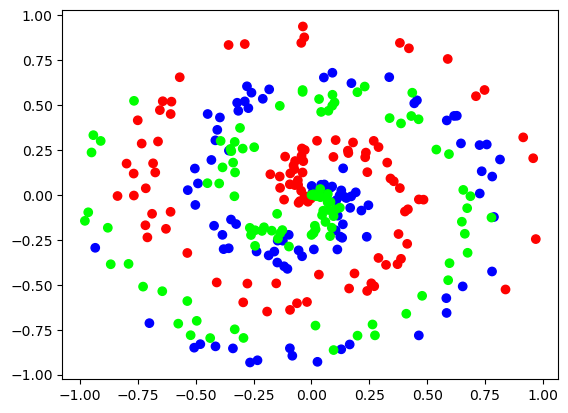

In [12]:
# lets also create a dataset
def spiral_data(points, classes, seed=None):
    """
    Generate a dataset with 3 classes where each class is a spiral, this is done by using polar coordinates.
    Polar coordinates are a way of representing a point in a plane using an angle and a radius. The angle is the
    angle between the point and the x-axis and the radius is the distance from the origin to the point.

    The equation for a spiral is r = a + b*theta where a is the distance from the origin to the center of the spiral and b is the distance between each loop.
    We can add a random noise to the theta value to make the spiral more interesting.

    Convert polar coordinates to cartesian coordinates to get the x and y values for the points. The x value is r * cos(theta) and the y value is r * sin(theta).
    """
    if seed is not None:
        np.random.seed(seed)
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points) # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2 # theta that is scaled by the class number and has some random noise added
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

# let's create an example dataset and plot it
X, y = spiral_data(100, 3, seed=0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')

Time to create a layer!

In [13]:
dense1 = Layer_Dense(2, 3) # 2 inputs, 3 outputs

# Display X
print("X is in the shape of the x coordinates and y coordinates of the points in the dataset.")
print(X[:5])

# Display y
print("y contains the class of each point in the dataset.(0, 1, or 2)")
print(y[:5])

# Pass the dataset through the first layer
dense1.forward(X)

# Display the output of the first layer
print("The output of the first layer:")
print(dense1.output[:5])

X is in the shape of the x coordinates and y coordinates of the points in the dataset.
[[0.         0.        ]
 [0.00299556 0.00964661]
 [0.01288097 0.01556285]
 [0.02997479 0.00444809]
 [0.03931246 0.00932828]]
y contains the class of each point in the dataset.(0, 1, or 2)
[0 0 0 0 0]
The output of the first layer:
[[ 0.          0.          0.        ]
 [-0.00104752  0.00113954 -0.00047984]
 [-0.00274148  0.00317291 -0.00086922]
 [-0.00421884  0.00526663 -0.00055913]
 [-0.00577077  0.00714014 -0.0008943 ]]


# Activation functions
We will now add activation functions to our network. Activation functions are used to add non-linearity to our network. Without non-linearity, our network would be equivalent to a single linear regression. We will use different activation functions so let's discuss them.

## Step function
The step function is a very simple activation function. It takes a number as input and returns 0 if the number is less than zero, and 1 if the number is greater than or equal to zero.

The step function can be described mathematically as:

$$f(x) = \begin{cases} 0 & x \leq 0 \\ 1 & x > 0 \end{cases}$$

## Linear function
The linear function is a very simple activation function. It takes a number as input and returns the same number.

The linear function can be described mathematically as:

$$f(x) = x$$

## Sigmoid function
The sigmoid function is a more complex activation function. It takes a number as input and returns a value between 0 and 1. The sigmoid function is often used in neural networks.

The sigmoid function can be described mathematically as:

$$f(x) = \frac{1}{1 + e^{-x}}$$

## Rectified linear unit (ReLU)
The rectified linear unit (ReLU) is a more complex activation function. It takes a number as input and returns the same number if it is greater than zero, and zero if it is less than or equal to zero.

The ReLU function can be described mathematically as:

$$f(x) = \begin{cases} 0 & x \leq 0 \\ x & x > 0 \end{cases}$$

## Hyperbolic tangent (tanh)
The hyperbolic tangent (tanh) is a more complex activation function. It takes a number as input and returns a value between -1 and 1. The tanh function is often used in neural networks.

The tanh function can be described mathematically as:

$$ f(x) = tanh(x) $$

## Leaky ReLU
The leaky ReLU is a more complex activation function. It takes a number as input and returns the same number if it is greater than zero, and a small number if it is less than or equal to zero.

The leaky ReLU function can be described mathematically as:

$$f(x) = \begin{cases} 0.01x & x \leq 0 \\ x & x > 0 \end{cases}$$

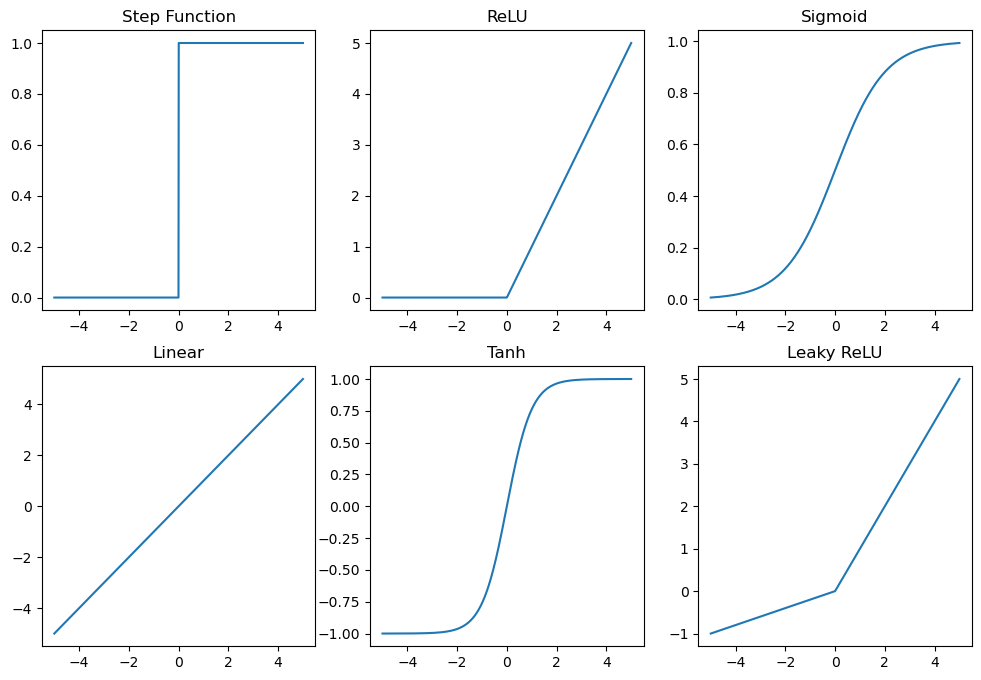

In [14]:
# Let's plot these activation functions
def step_function(x,w=1,b=0):
    return np.where(x*w+b >= 0, 1, 0)
    # Simple step function with basic parameters
    return np.where(x >= 0, 1, 0)

def relu(x,w=1,b=0):
    return np.maximum(0,x*w+b)
    # Simple relu function with basic parameters
    return np.maximum(0,x)

def sigmoid(x,w=1,b=0):
    return 1/(1+np.exp(-(x*w+b)))
    # Simple sigmoid function with basic parameters
    return 1/(1+np.exp(-x))

def linear(x,w=1,b=0):
    return x*w+b
    # Simple linear function with basic parameters
    return x

def tanh(x,w=1,b=0):
    return np.tanh(x*w+b)
    # Simple tanh function with basic parameters
    return np.tanh(x)

def leaky_relu(x,w=1,b=0):
    return np.where(x*w+b >= 0, x*w+b, (x*w+b)*0.2)
    # Simple leaky relu function with basic parameters
    return np.where(x >= 0, x, x*0.2) # Note that 0.2 is chosen arbitrarily. This is a hyperparameter that can be tuned.

## plot the functions
x = np.linspace(-5, 5, 1000)
### Make them separate plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.plot(x, step_function(x))
plt.title("Step Function")
plt.subplot(2, 3, 2)
plt.plot(x, relu(x))
plt.title("ReLU")
plt.subplot(2, 3, 3)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid")
plt.subplot(2, 3, 4)
plt.plot(x, linear(x))
plt.title("Linear")
plt.subplot(2, 3, 5)
plt.plot(x, tanh(x))
plt.title("Tanh")
plt.subplot(2, 3, 6)
plt.plot(x, leaky_relu(x))
plt.title("Leaky ReLU")
plt.show()

Let's take a look at how the weights and biases change the activation function.

In [15]:
def plot_activation_function(function, w=1, b=0):
    x = np.linspace(-5, 5, 1000)
    plt.plot(x, globals()[function](x, w, b))
    # draw axes transparently
    plt.axhline(0, color='black', alpha=0.3)
    plt.axvline(0, color='black', alpha=0.3)
    plt.title(globals()[function].__name__)
    plt.show()

interact(plot_activation_function, function=['step_function', 'relu', 'sigmoid', 'linear', 'tanh', 'leaky_relu'], w=(-5, 5, 0.1), b=(-5, 5, 0.1));

interactive(children=(Dropdown(description='function', options=('step_function', 'relu', 'sigmoid', 'linear', …

When we use two layers, we are basically using 2 activation functions in a row. Let's take a look at how the weights and biases change the activation function of two layers. We will use two times the same activation function with different weights and biases.

In [16]:
# use output of the first layer as input for the second layer
def plot_activation_functions(function="relu", w1=-1, b1=0.5, w2=-2, b2=1):
    x = np.linspace(-5, 5, 1000)
    # two layers
    plt.plot(x, globals()[function](x, w1, b1), label="layer 1", alpha=0.5, linestyle="--")
    plt.plot(x, globals()[function](x, w2, b2), label="layer 2", alpha=0.5, linestyle="--")
    # combined
    plt.plot(x, globals()[function](globals()[function](x, w1, b1), w2, b2), label="combined")

    plt.axhline(0, color='black', alpha=0.3)
    plt.axvline(0, color='black', alpha=0.3)
    plt.legend()
    plt.show()

interact(plot_activation_functions, function=["step_function", "relu", "sigmoid", "linear", "tanh", "leaky_relu"], w1=(-5, 5, 0.1), b1=(-5, 5, 0.1), w2=(-5, 5, 0.1), b2=(-5, 5, 0.1));

interactive(children=(Dropdown(description='function', index=1, options=('step_function', 'relu', 'sigmoid', '…

Let's implement the activation functions in Python using Classes.

In [17]:
class Activation_Linear:
    def forward(self, inputs):
        self.output = inputs

class Activation_Sigmoid:
    def forward(self, inputs):
        self.output = 1 / (1 + np.exp(-inputs))

class Activation_Tanh:
    def forward(self, inputs):
        self.output = np.tanh(inputs)

class Activation_Step:
    def forward(self, inputs):
        self.output = np.where(inputs >= 0, 1, 0)

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

class Activation_LeakyReLU:
    def forward(self, inputs):
        self.output = np.where(inputs >= 0, inputs, inputs * 0.2)


Let's now use our spiral data again to forward it through our dense layer and activation function.

In [18]:
def run_example(activation):
    # Create dataset
    X, y = spiral_data(points=100, classes=3,seed=123)

    # Create Dense layer with 2 input features and 3 output values
    dense1 = Layer_Dense(2, 3)

    # Create ReLU activation (to be used with Dense layer):
    activation1 = globals()[activation]()

    # Make a forward pass of our training data through this layer
    dense1.forward(X)

    # Make a forward pass through activation function
    # it takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Let's see output of the first few samples:
    print(activation1.output[:5])

interact(run_example, activation=["Activation_Linear", "Activation_Sigmoid", "Activation_Tanh", "Activation_Step", "Activation_ReLU", "Activation_LeakyReLU"]);

interactive(children=(Dropdown(description='activation', options=('Activation_Linear', 'Activation_Sigmoid', '…

## Softmax function
The softmax function is a function that makes sure the sum of the output of a layer is equal to 1. This is useful for classification problems. The softmax function is often used in the last layer of a neural network.

By making this sum equal to 1, we can interpret the output of the last layer as probabilities. The probability of a data point belonging to a certain class is equal to the output of the last layer for that class.

The softmax function can be described mathematically as:
$$f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$$

where $x_i$ is the output of the last layer for the $i$ th class. $n$ is the number of classes.

In [19]:
# Implementation of Softmax activation function
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Note: we subtract the max value from each input to avoid numerical instability (overflow/underflow).
        # Since we are only interested in the relative size of the values, this does not change the result.

        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

Let's now implement a two layer neural network with a relu activation function in the first layer and a softmax activation function in the second layer.

In [20]:
X, y=spiral_data(points=100, classes=3,seed=123)

# Creating our "layers + activations"
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Make a forward pass of our training data through the layers
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Take a look at the output of the first few samples:
print(activation2.output[:5])


[[0.33333333 0.33333333 0.33333333]
 [0.33327475 0.33336021 0.33336504]
 [0.33319461 0.33338896 0.33341643]
 [0.33309913 0.33340605 0.33349482]
 [0.33303266 0.33344175 0.33352559]]


We see that our outputs are all similar to each other because our weights are initialized randomly. We will now train our network to get better outputs. For this we will need to use a loss function (sometimes also called cost function).

## Categorical cross-entropy loss
The categorical cross-entropy loss is a loss function that is often used for classification problems. It is used to calculate the error of our network. The lower the error, the better our network is. The error is calculated by comparing the output of the last layer (y_pred) with the true labels (y_true).

The categorical cross-entropy loss can be described mathematically as:
$$L_i = -\sum_{j=1}^{n} y_{true,j} \log(y_{pred,j})$$

where $y_{true,j}$ is the true label for the $j$ th class. $y_{pred,j}$ is the output of the last layer for the $j$ th class. $n$ is the number of classes. $L_i$ is the loss for the $i$ th data point.

Note that if our prediction for a specific class is equal to 1 (and thus our model is very sure this is the class), log(y_pred) will be equal to 0. This means that the loss will be equal to 0. If our prediction is equal to 0, log(y_pred) will be equal to -infinity. This means that the loss will be equal to infinity. This is why we use the log function. It makes sure that the loss is always between 0 and infinity.

We will simplify the loss function to following formula:
$$L_i = -\log(y_{pred,k}) \text{ where } k \text{ is the index of the true label}$$

### Example

Let's perform an example to see how the loss function works. Let's say we have 3 classes and we have the following output from our last layer:

$$y_{pred} = \begin{bmatrix} 0.7 \ 0.1 \ 0.2 \end{bmatrix}$$

Let's say the true label is the first class. So y_true equals:

$$y_{true} = \begin{bmatrix} 1 \ 0 \ 0 \end{bmatrix}$$

The loss for this data point will be:

$$L_i = -(1* \log(0.7) + 0 * \log(0.1) + 0 * \log(0.2)) = -\log(0.7) = 0.36$$

Now let's say the true label is the second class. So y_true equals:

$$y_{true} = \begin{bmatrix} 0 \ 1 \ 0 \end{bmatrix}$$

The loss for this data point will be:

$$L_i = -(0 * \log(0.7) + 1 * \log(0.1) + 0 * \log(0.2)) = -\log(0.1) = 2.30$$

As you can see, the loss is higher when the model is less sure about the true label. This is what we want.

Let's now implement the loss function in Python.

In [21]:
# Let's create the example in code

y_pred = np.array([0.7, 0.1, 0.2])
y_true = np.array([1, 0, 0])

# Loss calculation
loss = - (np.log(y_pred[0]) * y_true[0] +
            np.log(y_pred[1]) * y_true[1] +
            np.log(y_pred[2]) * y_true[2])

print('Loss: ', loss)

Loss:  0.35667494393873245


In [22]:
# Now we will create a class that will calculate the loss for us

# We start with a base class for all losses, we can reuse this code later for our actual loss functions
class Loss:
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y) # We will implement this in the child classes
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss): #Note that we pass the Loss class as a parameter, this means that the calculate funcion will be available in this new class
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # As to not divide by zero, clip the values to a minimum and maximum value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # If labels are just a single number (like [0,1,1,1,0,2]) 
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true] 
            # example: y_pred_clipped = [[0.1, 0.2, 0.7]] and y_true = [2] then when we do y_pred_clipped[range(samples), y_true] we get [0.7]
            # range(samples) will make sure we get it for all samples in the batch

        # If labels are one-hot encoded (like [[1,0,0],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[0,0,1]])
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
            # example: y_pred_clipped = [[0.1, 0.2, 0.7]] and y_true = [[1, 0, 0]] then when we multiply them we get [[0.1, 0, 0]] and then we sum the values of each row to get [0.1]

        # Negative log likelihood (cross-entropy)
        negative_log_likelihoods = -np.log(correct_confidences)

        return negative_log_likelihoods

In [23]:
# Let's use our new loss function on our example
y_pred = np.array([[0.7, 0.2, 0.1]])
y_true = np.array([[1, 0, 0]])

loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(y_pred, y_true)

print('Loss: ', loss)


Loss:  0.35667494393873245


In [24]:
# Let's now try it on our spiral dataset
X, y = spiral_data(points=100, classes=3,seed=123)

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Make a forward pass of our training data through this layer
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Calculate the data loss
loss = loss_function.calculate(activation2.output, y)

# Print some example values
print(activation2.output[:5])

# Print loss value
print('loss:', loss)

[[0.33333333 0.33333333 0.33333333]
 [0.33327475 0.33336021 0.33336504]
 [0.33319461 0.33338896 0.33341643]
 [0.33309913 0.33340605 0.33349482]
 [0.33303266 0.33344175 0.33352559]]
loss: 1.0984322878581796


# Metrics
Metrics are used to evaluate the performance of our model. We will use the accuracy metric to evaluate our model.

## Accuracy
The accuracy metric is a metric that is often used for classification problems. It is used to calculate the accuracy of our network. The higher the accuracy, the better our network is. The accuracy is calculated by comparing the output of the last layer (y_pred) with the true labels (y_true).

The accuracy can be described mathematically as:

$$\text{accuracy} = \frac{\text{number of correct predictions}}{\text{total number of predictions}}$$

Let's now implement the accuracy metric in Python.

In [25]:
def accuracy(y_true, y_pred):
    # Number of correct predictions
    predictions = np.argmax(y_pred, axis=1) # We are taking the index of the highest value in each row (the predicted class)
    # We could do this as the following:
    # accuracy = np.sum(predictions == y_true) / len(y_true)
    # But a more efficient way is to use the mean function
    accuracy = np.mean(predictions == y_true)

    return accuracy

In [26]:
# Let's use our new accuracy function on an example
y_pred = np.array([[0.7, 0.2, 0.1], # correct class is 0
                    [0.1, 0.5, 0.4], # correct class is 2
                    [0.02, 0.9, 0.08]]) # correct class is 1

y_true = np.array([0, 2, 1])

print('Accuracy:', accuracy(y_true, y_pred))

Accuracy: 0.6666666666666666


In [27]:
# On our spiral dataset
X, y = spiral_data(points=100, classes=3,seed=123)

# Model layers
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Send a dataset through our model
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

# Print the accuracy of our output
print('Accuracy:', accuracy(y, activation2.output))

# Since our model is random, we expect that for three classes, the accuracy should be around 33% (1/3) without training

Accuracy: 0.29333333333333333


# Improving our model
Until now our model is not very good. We will now improve our model by training it. A simple strategy could be to randomly change the weights and biases and see if the loss decreases. If the loss decreases, we keep the new weights and biases. 

As we will see, this is not a very efficient way of training our model. But let's try it anyways!

In [28]:
# Let's create a new type of dataset that is easier than a spiral dataset
# This datasets will have n classes and each class will be centered around a linearly separable x coordinate
def vertical_data(samples=100, classes=3, seed=None):
    if seed is not None:
        np.random.seed(seed)
    linspace_X = np.linspace(0, 1, classes+2)[1:-1] # We will use this to create the x coordinates of our classes
    X=[]
    y=np.array([])
    # spacing
    spacing=1/(classes)
    for class_number in range(classes):
        x_coord = linspace_X[class_number] * np.ones(samples)+ np.random.rand(samples)*spacing
         # x coordinates will be the same for each class
        # y coordinates will be random between 0 and 1
        y_coord = np.random.rand(samples)
        X.append(np.vstack((x_coord, y_coord)).T)
        y = np.append(y, np.ones(samples)*class_number)
    X = np.vstack(X)
    y = np.hstack(y.astype(int))
    return X, y
        


In [29]:
print(vertical_data(200,3)[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

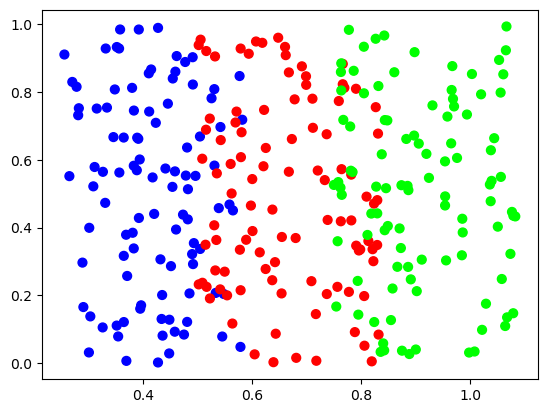

In [30]:
# Let's use our new dataset and visualize it
X, y = vertical_data(samples=100, classes=3, seed=123)
#print(X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()


In [31]:
# Lowest loss value
lowest_loss = 9999999

# create our model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Save the best weights
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

message = f'Best loss: {lowest_loss:.3f}'

# Initialize progress bar
progress_bar = tqdm.trange(10000, unit='epoch', desc=message)

# Let's train our model multiple times and update weights and biases randomly
# We show a progress bar with best loss value
for iteration in progress_bar:
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Make a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Calculate the data loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    # if loss is smaller, a new best model is found, save weights and biases
    if loss < lowest_loss:
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
        progress_bar.set_description(f'Best loss: {lowest_loss:.3f}, accuracy: {accuracy:.3f}')



Best loss: 1.031, accuracy: 0.470:   4%|▍         | 442/10000 [00:00<00:04, 2206.56epoch/s]

Best loss: 1.031, accuracy: 0.470: 100%|██████████| 10000/10000 [00:03<00:00, 3117.15epoch/s]


Let's be a bit smarter about it. What if we always revert to our best model if the new model did not improve?

In [32]:
# Lowest loss value
lowest_loss = 9999999

# create our model
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Save the best weights
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

message = f'Best loss: {lowest_loss:.3f}'

# Initialize progress bar
progress_bar = tqdm.trange(10000, unit='epoch', desc=message)

# Let's train our model multiple times and update weights and biases randomly
# We show a progress bar with best loss value
for iteration in progress_bar:
    dense1.weights += 0.05 * np.random.randn(2, 3)
    dense1.biases += 0.05 * np.random.randn(1, 3)
    dense2.weights += 0.05 * np.random.randn(3, 3)
    dense2.biases += 0.05 * np.random.randn(1, 3)

    # Make a forward pass of our training data through this layer
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    # Calculate the data loss
    loss = loss_function.calculate(activation2.output, y)

    # Calculate accuracy from output
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)

    # if loss is smaller, a new best model is found, save weights and biases
    if loss < lowest_loss:
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
        progress_bar.set_description(f'Best loss: {lowest_loss:.3f}, accuracy: {accuracy:.3f}')
    else:
        # revert back to the best weights and biases
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()



Best loss: 0.291, accuracy: 0.833: 100%|██████████| 10000/10000 [00:04<00:00, 2376.01epoch/s]


This delivers already a better result. But we can do better. We will now use the gradient descent algorithm to train our model. For this we will first take a look at the gradient of the loss function.

## Gradient

A gradient is a vector (a list of numbers) that points in the direction of the change of a function. For this, let's taak a look at some simple examples.

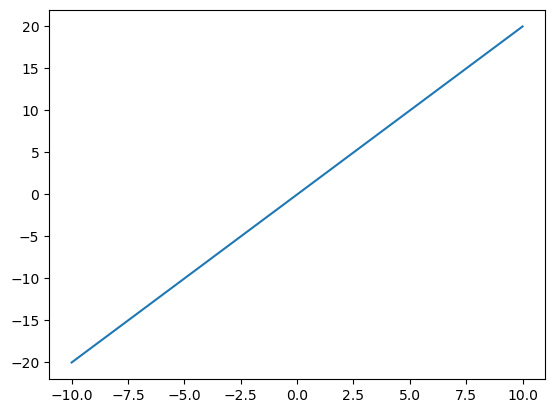

In [33]:
# a very simple function:
def f(x):
    return 2*x

x=np.linspace(-10,10,100)
y=f(x)

plt.plot(x,y)
plt.show()

In [34]:
# Here the gradient of the function is basically the slope of the line. We could calculate this by taking the difference over the y-axis and dividing it by the difference over the x-axis. This is the derivative of the function.

# Let's take 2 points on the graph:
x1 = 0
x2 = 1

# Calculate the points on y-axis
y1 = f(x1)
y2 = f(x2)

# Calculate the slope of the line
m = (y2-y1)/(x2-x1)

print(m)

2.0


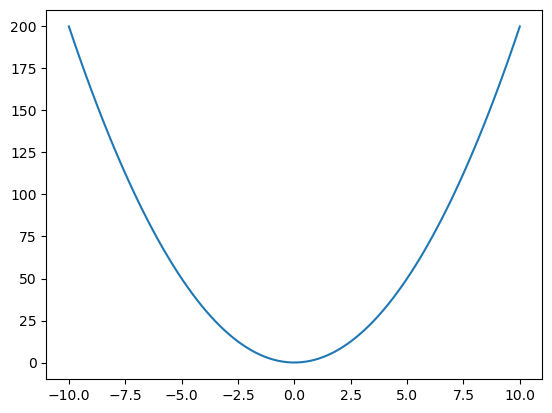

In [35]:
# That made sense, now let's take a look at a more complex function:
def f(x):
    return 2*x**2

x=np.linspace(-10,10,100)
y=f(x)

plt.plot(x,y)
plt.show()

In [36]:
# Let's take 2 points on the graph:
x1 = 0
x2 = 1

# Calculate the points on y-axis
y1 = f(x1)
y2 = f(x2)

# Calculate the slope of the line
m = (y2-y1)/(x2-x1)

print("Slope 1:", m)

# Let's also take 2 other points on the graph:
x1 = 2
x2 = 3

# Calculate the points on y-axis
y1 = f(x1)
y2 = f(x2)

# Calculate the slope of the line
m = (y2-y1)/(x2-x1)

print("Slope 2:", m)


Slope 1: 2.0
Slope 2: 10.0


🤔 This is different for both points. This is because we have a second degree function. Then the slope is no longer constant but it changes as X changes.

We could go into more detail on how to calculate the gradient of a function. But for now we will just use the known rules to calculate the gradient of the loss function. The formulas that we get for these are called derivatives.

In general we write that the derivative as follows:

$$\frac{d}{dx} f(x) = f'(x)$$

### Some rules for calculating derivatives of functions

The power rule is used to calculate the derivative of a function that is raised to a power. The derivative of a function raised to a power is equal to the power times the function raised to the power minus 1 times the derivative of the function.

$$\frac{d}{dx} x^n = nx^{n-1}$$

The sum rule is used to calculate the derivative of a sum of functions. The derivative of a sum of functions is equal to the sum of the derivatives of the functions.

$$\frac{d}{dx} (a + b) = \frac{d}{dx} a + \frac{d}{dx} b$$

As a side effect, when the function is a constant, the derivative is equal to 0:

$$ f(x) = a \Rightarrow \frac{d}{dx} f(x) = 0$$

$$\frac{d}{dx} a = \frac{d}{dx} a * x^0 = 0*a * x^{-1} = 0$$

For a first degree function, the derivative is equal to the slope of the function:

$$ f(x) = ax + b \Rightarrow \frac{d}{dx} f(x) = a$$

$$\frac{d}{dx} ax + b = \frac{d}{dx} a * x + \frac{d}{dx} b = a * 1 * x^0 + 0 = a$$

You can keep on expanding this to higher order functions. Let's try a final example:

$$ f(x) = x^3 + 2x^2 - 5x + 7 \Rightarrow \frac{d}{dx} f(x) = 3x^2 + 4x - 5$$

$$\frac{d}{dx} x^3 + 2x^2 - 5x + 7 = \frac{d}{dx} x^3 + \frac{d}{dx} 2x^2 + \frac{d}{dx} -5x + \frac{d}{dx} 7 = 3x^2 + 4x - 5$$

Not too shabby!

## The partial derivative of a sum

The partial derivative of a sum is equal to the sum of the partial derivatives of the functions.

A partial derivative is the derivative of a function with respect to one of the variables. For example, if we have a function f(x, y), the partial derivative of f with respect to x is equal to the derivative of f with respect to x and the other variables are treated as constants.

For example:

$$\text{ partial derivative of x: } f(x,y) = x + y \Rightarrow \frac{\partial}{\partial x} f(x,y) = \frac{\partial}{\partial x} (x + y) = \frac{\partial}{\partial x} x + \frac{\partial}{\partial x} y = 1 + 0 = 1$$

$$\text{ partial derivative of y: } f(x,y) = x + y \Rightarrow \frac{\partial}{\partial y} f(x,y) = \frac{\partial}{\partial y} (x + y) = \frac{\partial}{\partial y} x + \frac{\partial}{\partial y} y = 0 + 1 = 1$$

A more complex example:

$$\text{ partial derivative of x: } f(x,y) = 2x + 3y^2 \Rightarrow \frac{\partial}{\partial x} f(x,y) = \frac{\partial}{\partial x} (2x + 3y^2) = \frac{\partial}{\partial x} 2x + \frac{\partial}{\partial x} 3y^2 = 2 + 0 = 2$$

$$\text{ partial derivative of y: } f(x,y) = 2x + 3y^2 \Rightarrow \frac{\partial}{\partial y} f(x,y) = \frac{\partial}{\partial y} (2x + 3y^2) = \frac{\partial}{\partial y} 2x + \frac{\partial}{\partial y} 3y^2 = 0 + 6y = 6y$$

Even more complex example:

$$\text{ partial derivative of x: } f(x,y) = 2x^2 + 3y^2 + 4x + 5y \Rightarrow \frac{\partial}{\partial x} f(x,y) = \frac{\partial}{\partial x} (2x^2 + 3y^2 + 4x + 5y) = \frac{\partial}{\partial x} 2x^2 + \frac{\partial}{\partial x} 3y^2 + \frac{\partial}{\partial x} 4x + \frac{\partial}{\partial x} 5y = 4x + 0 + 4 + 0 = 4x + 4$$

$$\text{ partial derivative of y: } f(x,y) = 2x^2 + 3y^2 + 4x + 5y \Rightarrow \frac{\partial}{\partial y} f(x,y) = \frac{\partial}{\partial y} (2x^2 + 3y^2 + 4x + 5y) = \frac{\partial}{\partial y} 2x^2 + \frac{\partial}{\partial y} 3y^2 + \frac{\partial}{\partial y} 4x + \frac{\partial}{\partial y} 5y = 0 + 6y + 0 + 5 = 6y + 5$$

## The partial derivative of multiplication

The partial derivative of multiplication is equal to the product of the partial derivatives of the functions. Since other variables are treated as constants, these can be moved in front of the derivative. This is basically the same as having the derivative of a*x^n = n*a*x^(n-1).

$$\text{ partial derivative of x: } f(x,y) = x * y \Rightarrow \frac{\partial}{\partial x} f(x,y) = \frac{\partial}{\partial x} (x * y) = y * \frac{\partial}{\partial x} x = y * 1 = y$$

$$\text{ partial derivative of y: } f(x,y) = x * y \Rightarrow \frac{\partial}{\partial y} f(x,y) = \frac{\partial}{\partial y} (x * y) = x * \frac{\partial}{\partial y} y = x * 1 = x$$

A more complex example with 3 variables:

$$\text{ partial derivative of x: } f(x,y,z) = 3x^3z - y^2 + 5z + 2yz \Rightarrow \frac{\partial}{\partial x} f(x,y,z) \\ = \frac{\partial}{\partial x} (3x^3z - y^2 + 5z + 2yz) = \frac{\partial}{\partial x} 3x^3z + \frac{\partial}{\partial x} -y^2 + \frac{\partial}{\partial x} 5z + \frac{\partial}{\partial x} 2yz = 9x^2z + 0 + 0 + 0 = 9x^2z$$

$$\text{ partial derivative of y: } f(x,y,z) = 3x^3z - y^2 + 5z + 2yz \Rightarrow \frac{\partial}{\partial y} f(x,y,z) \\= \frac{\partial}{\partial y} (3x^3z - y^2 + 5z + 2yz) = \frac{\partial}{\partial y} 3x^3z + \frac{\partial}{\partial y} -y^2 + \frac{\partial}{\partial y} 5z + \frac{\partial}{\partial y} 2yz = 0 + -2y + 0 + 2z = -2y + 2z$$

$$\text{ partial derivative of z: } f(x,y,z) = 3x^3z - y^2 + 5z + 2yz \Rightarrow \frac{\partial}{\partial z} f(x,y,z)\\ = \frac{\partial}{\partial z} (3x^3z - y^2 + 5z + 2yz) = \frac{\partial}{\partial z} 3x^3z + \frac{\partial}{\partial z} -y^2 + \frac{\partial}{\partial z} 5z + \frac{\partial}{\partial z} 2yz = 3x^3 + 0 + 5 + 2y = 3x^3 + 5 + 2y$$

## The partial derivative of the max function

We have to use the max function in our forward pass, so to backtrack we also need the slope of this function. 

The max function is defined as:

$$\text{max}(x,y) = \begin{cases} x & \text{if } x > y \\ y & \text{if } y > x \end{cases}$$

The partial derivative of the max function is defined as:

$$\frac{\partial}{\partial x} \text{max}(x,y) = \begin{cases} 1 & \text{if } x > y \\ 0 & \text{if } y > x \end{cases}$$

$$\frac{\partial}{\partial y} \text{max}(x,y) = \begin{cases} 0 & \text{if } x > y \\ 1 & \text{if } y > x \end{cases}$$

In the ReLU function, we have to use the max function, and we always check if x > 0. So the ReLU function is defined as:

$$\text{ReLU}(x) = max(x,0)$$

The partial derivative of the ReLU function is defined as:

$$\frac{d}{dx} \text{ReLU}(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x \leq 0 \end{cases}$$

Note that this is just a normal derivative and not a partial derivative. This is because the ReLU function only has one variable, so there is no need to differentiate with respect to other variables.

## The gradient vector

The gradient vector is a vector that contains the partial derivatives of a function. The gradient vector for two variables is defined as:

$$\nabla f(x,y) = \begin{bmatrix} \frac{\partial}{\partial x} f(x,y) \\ \frac{\partial}{\partial y} f(x,y) \end{bmatrix}$$

Example with three variables:

$$f(x,y,z) = 3x^3z - y^2 + 5z + 2yz \Rightarrow $$
$$      \frac{\partial}{\partial x} f(x,y,z) = 9x^2z$$
$$      \frac{\partial}{\partial y} f(x,y,z) = -2y + 2z$$
$$      \frac{\partial}{\partial z} f(x,y,z) = 3x^3 + 5 + 2y$$

Also written as a gradient vector:

$$\nabla f(x,y,z) = \begin{bmatrix} \frac{\partial}{\partial x} f(x,y,z) \\ \frac{\partial}{\partial y} f(x,y,z) \\ \frac{\partial}{\partial z} f(x,y,z) \end{bmatrix} = \begin{bmatrix} \frac{\partial}{\partial x} \\ \frac{\partial}{\partial y} \\ \frac{\partial}{\partial z} \end{bmatrix} f(x,y,z) = \begin{bmatrix} 9x^2z \\ -2y + 2z \\ 3x^3 + 5 + 2y \end{bmatrix}$$

We will use the gradient vector to update the weights and biases in our neural network. The gradient vector is calculated by using the chain rule. 

## The chain rule

The chain rule is used to calculate the partial derivative of a function that is composed of multiple functions. An example:

$$z=g(x)$$

$$y=f(z)$$

$$\Rightarrow y=f(g(x))$$

The chain rule says that:

$$\frac{d}{dx} f(g(x)) = \frac{df(g(x))}{dg(x)} \cdot \frac{dg(x)}{dx} = f'(g(x)) \cdot g'(x)$$

Or in other words:

$$\frac{d}{dx} f(g(x)) = \frac{\partial}{\partial z} f(z) \cdot \frac{\partial}{\partial x} g(x) = f'(z) \cdot g'(x)$$

This means that we can calculate the partial derivative of a function that is composed of multiple functions by multiplying the partial derivatives of the functions together! 

Another example:

$$\frac{\partial}{\partial x}f(g(y,h(x,z))) = \frac{\partial f(g(y,h(x,z)))}{\partial g(y,h(x,z))} \cdot \frac{\partial g(y,h(x,z))}{\partial h(x,z)} \cdot \frac{\partial h(x,z)}{\partial x} = f'(g(y,h(x,z))) \cdot g'(y,h(x,z)) \cdot h'(x,z) \cdot x'$$

Ough, that seems complicated. No worries thought, let's make a numerical example!

### Example

$$h(x) = 3(2x^2)^5$$

Split the function into two functions:

$$f(x) = 3g(x)^5$$

$$g(x) = 2x^2$$

Thus we have:

$$h(x) = f(g(x)) = 3(2x^2)^5$$

Now we can calculate the partial derivative of h(x) with respect to x. Thus we need to calculate f'(g(x)) and g'(x).

For f'(g(x)), g(x) is 2x^2, so let's replace this for now by y:

$$f'(g(x)) = f'(y) = f'(3(y)^5) = 15y^4$$

Now we can revert back to g(x):

$$f'(g(x)) = 15(2x^2)^4$$

For g'(x), we have:

$$g'(x) = g'(2x^2) = 4x$$

To calculate the partial derivative of h(x) with respect to x, we multiply the partial derivatives together:

$$\frac{\partial}{\partial x} h(x) = f'(g(x)) \cdot g'(x) = 15(2x^2)^4 \cdot 4x$$

We can simplify this a bit:

$$f'(x) = 15(2x^2)^4 \cdot 4x = 15 \cdot (2^4 \cdot x^{2 \cdot 4}) \cdot 4x = 15 \cdot 2^4 \cdot x^8 \cdot 4x$$

Combine x's and constants:

$$f'(x) = 960 x^9$$

Whewh! That was some complicated math, but hey! We did it! Now we can calculate the gradient vector for our neural network which we will use to update the weights and biases in an intelligent way! This is called backpropagation.

## Backpropagation

Backpropagation is the process of calculating the gradient vector of a neural network. This is done by using the chain rule. The gradient vector is used to update the weights and biases in the neural network.

Let's just recall on how a forward pass works with three inputs and a single output neuron:

In [37]:
x = [1.0, -2.0, 3.0] # input
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# First we multiply the input by the weights
xw = [a*b for a,b in zip(x,w)]

# Then we add the bias to the sum of the products
z = sum(xw) + b

# Finally we apply the activation function (in this case ReLU -> if x < 0 return 0, else return x)
y = max(z, 0)

print(y)

6.0


You could write this as:

$$\text{Relu}(\sum[inputs \cdot weights] + bias)$$

or also:

$$\text{Relu}(x_0 \cdot w_0 + x_1 \cdot w_1 + x_2 \cdot w_2 + bias)$$

Now we want to know how each parameter effects the output (more precisely, the gradient of the output with respect to the parameter). So let's rewrite the equation:

$$y=\text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias))$$

Let's try to calculate the gradient of the output with respect to input x_0. We can do this by using the chain rule:

$$\frac{\partial}{\partial x_0} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias))$$

$$= \frac{d\text{Relu(...)}}{d\text{sum(...)}} \cdot \frac{\partial\text{sum(...)}}{\partial\text{mul}(x_0, w_0)} \cdot \frac{\partial\text{mul}(x_0, w_0)}{\partial x_0}$$

The "..." are left out to improve readability. Normally this would contain everything that was placed in the brackets in the full equation.

Let's start with the first partial derivative, the one of the Relu function. Earlier we have seen that the Relu function can be written as:

$$f(x)= max(x,0)$$

The derivative of this function is:

$$\frac{d}{dx}f(x) = 1(x>0)$$

Let's imagine that we get a gradient from the next layer that is equal to 1. We will explain this later. Instead of calling it x, we will call it z:

$$\frac{d}{dz}f(z) = 1(z>0)$$

Thus the result of the first partial derivative is 1.

In [38]:
# Or in python:
z=1.0
drelu_dz = 1. * (z > 0)
print(drelu_dz)

1.0


Next up: the partial derivative of the sum function. The sum function can be written as:

$$\text{sum}(x_0, x_1, x_2) = x_0 + x_1 + x_2$$

Remember the rules regarding the derivative of a sum:

$$f(x,y) = x + y \Rightarrow \frac{\partial}{\partial x} f(x,y) = 1$$

$$f(x,y) = x + y \Rightarrow \frac{\partial}{\partial y} f(x,y) = 1$$

So no matter what the input is, the result is always 1!

$$\frac{d}{dx_0}\text{sum}(x_0, x_1, x_2) = 1$$

Thus the result of the second partial derivative is 1.

The third partial derivative is the partial derivative of the multiplication function. The multiplication function can be written as:

$$\text{mul}(x_0, w_0) = x_0 \cdot w_0$$

Remember the rules regarding the derivative of a multiplication:

$$f(x,y) = x \cdot y \Rightarrow \frac{\partial}{\partial x} f(x,y) = y$$

$$f(x,y) = x \cdot y \Rightarrow \frac{\partial}{\partial y} f(x,y) = x$$

So the result of the third partial derivative is w_0.

Now we can multiply all the partial derivatives together:

$$\frac{\partial}{\partial x_0} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = 1 \cdot 1 \cdot w_0$$

This is the gradient of the output with respect to input x_0. We can do the same for the other inputs and the bias. The result is:

$$\frac{\partial}{\partial x_0} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = w_0$$

$$\frac{\partial}{\partial x_1} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = w_1$$

$$\frac{\partial}{\partial x_2} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = w_2$$

$$\frac{\partial}{\partial bias} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = 1$$

$$\frac{\partial}{\partial w_0} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = x_0$$

$$\frac{\partial}{\partial w_1} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = x_1$$

$$\frac{\partial}{\partial w_2} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = x_2$$

In [39]:
# For the example above, we get:
x = [1.0, -2.0, 3.0] # input
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

dx0 = w[0]
dx1 = w[1]
dx2 = w[2]

db = 1

dw0 = x[0]
dw1 = x[1]
dw2 = x[2]

print(f"dx0: {dx0}, dx1: {dx1}, dx2: {dx2}, db: {db}, dw0: {dw0}, dw1: {dw1}, dw2: {dw2}")

dx0: -3.0, dx1: -1.0, dx2: 2.0, db: 1, dw0: 1.0, dw1: -2.0, dw2: 3.0


Almost there!

Recall we used an example z of 1. We need to generalize our function to any z. This will result in the following for the partial derivative in respect to x0:

$$\frac{\partial}{\partial x_0} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = z \cdot 1(z>0) \cdot w_0$$

And for the others:

$$\frac{\partial}{\partial x_1} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = z \cdot 1(z>0) \cdot w_1$$

$$\frac{\partial}{\partial x_2} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = z \cdot 1(z>0) \cdot w_2$$

$$\frac{\partial}{\partial bias} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = z \cdot 1(z>0) \cdot 1$$

$$\frac{\partial}{\partial w_0} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = z \cdot 1(z>0) \cdot x_0$$

$$\frac{\partial}{\partial w_1} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = z \cdot 1(z>0) \cdot x_1$$

$$\frac{\partial}{\partial w_2} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias)) = z \cdot 1(z>0) \cdot x_2$$


In [40]:
# For our example above, we get:
x = [1.0, -2.0, 3.0] # input
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

z = 1.0 # output gradient of the previous layer

dx0 = z * 1*(z>0) * w[0]
dx1 = z * 1*(z>0) * w[1]
dx2 = z * 1*(z>0) * w[2]

db = z * 1*(z>0) * 1

dw0 = z * 1*(z>0) * x[0]
dw1 = z * 1*(z>0) * x[1]
dw2 = z * 1*(z>0) * x[2]

print(f"dx0: {dx0}, dx1: {dx1}, dx2: {dx2}, db: {db}, dw0: {dw0}, dw1: {dw1}, dw2: {dw2}")

dx = [dx0, dx1, dx2]
dw = [dw0, dw1, dw2]

dx0: -3.0, dx1: -1.0, dx2: 2.0, db: 1.0, dw0: 1.0, dw1: -2.0, dw2: 3.0


In [41]:
# Interactive example of gradients by changing z-value:

@interact(z=(-10,10,0.1))
def update(z=1.0):
    x = [1.0, -2.0, 3.0] # input
    w = [-3.0, -1.0, 2.0] # weights
    b = 1.0 # bias

    dx0 = z * 1*(z>0) * w[0]
    dx1 = z * 1*(z>0) * w[1]
    dx2 = z * 1*(z>0) * w[2]

    db = z * 1*(z>0) * 1

    dw0 = z * 1*(z>0) * x[0]
    dw1 = z * 1*(z>0) * x[1]
    dw2 = z * 1*(z>0) * x[2]

    print(f"dx0: {dx0}, dx1: {dx1}, dx2: {dx2}, db: {db}, dw0: {dw0}, dw1: {dw1}, dw2: {dw2}")

interactive(children=(FloatSlider(value=1.0, description='z', max=10.0, min=-10.0), Output()), _dom_classes=('…

Final step: we update the weights and bias using the gradient. We don't update using the full gradient because we want to update the weights and bias in the direction of the gradient. We do this by multiplying the gradient by a learning rate alpha. The learning rate is a hyperparameter that we can tune. The learning rate determines how much we update the weights and bias. If the learning rate is too small, the weights and bias will not change much. If the learning rate is too large, the weights and bias will change too much and we might not converge to the optimal solution. The learning rate is usually between 0.01 and 0.0001.

$$w_0 = w_0 - \alpha \cdot \frac{\partial}{\partial w_0} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias))$$

$$w_1 = w_1 - \alpha \cdot \frac{\partial}{\partial w_1} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias))$$

$$w_2 = w_2 - \alpha \cdot \frac{\partial}{\partial w_2} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias))$$

$$bias = bias - \alpha \cdot \frac{\partial}{\partial bias} \text{Relu}(\text{sum}(\text{mul}(x_0, w_0), \text{mul}(x_1, w_1), \text{mul}(x_2, w_2), bias))$$

Or using the simpler notations from the code:

$$w_0 = w_0 - \alpha \cdot dw_0$$

$$w_1 = w_1 - \alpha \cdot dw_1$$

$$w_2 = w_2 - \alpha \cdot dw_2$$

$$bias = bias - \alpha \cdot db$$

Note that we don't update the inputs since we do not change the data but only the model!

In [42]:
# update the weights and biases

# We use dw and db from 2 cells above
# We use learning rate = 0.01

# Instead of using notation w0 = w0 - 0.01 * dw0, we can use the following notation:
# w0 -= 0.01 * dw0

w[0] += -0.01 * dw[0]
w[1] += -0.01 * dw[1]
w[2] += -0.01 * dw[2]

b += -0.01 * db

print(f"w0: {w[0]}, w1: {w[1]}, w2: {w[2]}, b: {b}")


w0: -3.01, w1: -0.98, w2: 1.97, b: 0.99


In [43]:
# Let's calculate our new output:

x = [1.0, -2.0, 3.0] # input

# First we multiply the input by the weights
xw = [a*b for a,b in zip(x,w)]

# Then we add the bias to the sum of the products
z = sum(xw) + b

# Finally we apply the activation function (in this case ReLU -> if x < 0 return 0, else return x)

y = max(z, 0)

print(y)

5.8500000000000005


Great! We have updated one Relu neuron!

We went from

<svg width="400" height="400" xmlns="http://www.w3.org/2000/svg"><g></g><g><circle cx="150" cy="200.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="70" y1="100.0" x2="130" y2="200.0" stroke="black" stroke-width="1"/><line x1="70" y1="200.0" x2="130" y2="200.0" stroke="black" stroke-width="1"/><line x1="70" y1="300.0" x2="130" y2="200.0" stroke="black" stroke-width="1"/></g><g><line x1="170" y1="200.0" x2="230" y2="200.0" stroke="black" stroke-width="1"/></g><text x="50" y="100.0" text-anchor="middle" alignment-baseline="middle" font-size="20">1.0</text><text x="50" y="200.0" text-anchor="middle" alignment-baseline="middle" font-size="20">-2.0</text><text x="50" y="300.0" text-anchor="middle" alignment-baseline="middle" font-size="20">3.0</text><text x="100" y="95.0" text-anchor="middle" alignment-baseline="middle" font-size="15" fill="red">-3</text><text x="100" y="195.0" text-anchor="middle" alignment-baseline="middle" font-size="15" fill="red">-1</text><text x="100" y="295.0" text-anchor="middle" alignment-baseline="middle" font-size="15" fill="blue">2</text><text x="150" y="200.0" text-anchor="middle" alignment-baseline="middle" font-size="20">1</text></svg>

To

<svg width="400" height="400" xmlns="http://www.w3.org/2000/svg"><g></g><g><circle cx="150" cy="200.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="70" y1="100.0" x2="130" y2="200.0" stroke="black" stroke-width="1"/><line x1="70" y1="200.0" x2="130" y2="200.0" stroke="black" stroke-width="1"/><line x1="70" y1="300.0" x2="130" y2="200.0" stroke="black" stroke-width="1"/></g><g><line x1="170" y1="200.0" x2="230" y2="200.0" stroke="black" stroke-width="1"/></g><text x="50" y="100.0" text-anchor="middle" alignment-baseline="middle" font-size="20">1.0</text><text x="50" y="200.0" text-anchor="middle" alignment-baseline="middle" font-size="20">-2.0</text><text x="50" y="300.0" text-anchor="middle" alignment-baseline="middle" font-size="20">3.0</text><text x="100" y="95.0" text-anchor="middle" alignment-baseline="middle" font-size="15" fill="red">-3.01</text><text x="100" y="195.0" text-anchor="middle" alignment-baseline="middle" font-size="15" fill="red">-0.98</text><text x="100" y="295.0" text-anchor="middle" alignment-baseline="middle" font-size="15" fill="blue">1.97</text><text x="150" y="200.0" text-anchor="middle" alignment-baseline="middle" font-size="20">0.99</text></svg>

Upgrade time. Let's now work with following network:

<svg width="400" height="600" xmlns="http://www.w3.org/2000/svg"><g></g><g><circle cx="350.0" cy="170.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="70.0" y1="110.0" x2="330.0" y2="170.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="230.0" x2="330.0" y2="170.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="350.0" x2="330.0" y2="170.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="470.0" x2="330.0" y2="170.0" stroke="black" stroke-width="1"/><circle cx="350.0" cy="290.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="70.0" y1="110.0" x2="330.0" y2="290.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="230.0" x2="330.0" y2="290.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="350.0" x2="330.0" y2="290.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="470.0" x2="330.0" y2="290.0" stroke="black" stroke-width="1"/><circle cx="350.0" cy="410.0" r="20" stroke="black" stroke-width="1" fill="white"/><line x1="70.0" y1="110.0" x2="330.0" y2="410.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="230.0" x2="330.0" y2="410.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="350.0" x2="330.0" y2="410.0" stroke="black" stroke-width="1"/><line x1="70.0" y1="470.0" x2="330.0" y2="410.0" stroke="black" stroke-width="1"/></g><text x="50" y="110.0" text-anchor="middle" alignment-baseline="middle" font-size="20">1.0</text><text x="50" y="230.0" text-anchor="middle" alignment-baseline="middle" font-size="20">2.0</text><text x="50" y="350.0" text-anchor="middle" alignment-baseline="middle" font-size="20">3.0</text><text x="50" y="470.0" text-anchor="middle" alignment-baseline="middle" font-size="20">2.5</text><text x="145.0" y="125.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="blue">0.2</text><text x="145.0" y="155.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="blue">0.5</text><text x="145.0" y="185.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="red">-0.26</text><text x="145.0" y="215.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="blue">0.8</text><text x="145.0" y="245.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="red">-0.91</text><text x="145.0" y="275.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="red">-0.27</text><text x="145.0" y="305.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="red">-0.5</text><text x="145.0" y="335.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="blue">0.26</text><text x="145.0" y="365.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="blue">0.17</text><text x="145.0" y="395.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="blue">1.0</text><text x="145.0" y="425.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="red">-0.5</text><text x="145.0" y="455.0" text-anchor="middle" alignment-baseline="middle" font-size="20" fill="blue">0.87</text><text x="350.0" y="170.0" text-anchor="middle" alignment-baseline="middle" font-size="20">2.0</text><text x="350.0" y="290.0" text-anchor="middle" alignment-baseline="middle" font-size="20">3.0</text><text x="350.0" y="410.0" text-anchor="middle" alignment-baseline="middle" font-size="20">0.5</text></svg>

In [44]:
# Let's put this in code :D

inputs=[1.0, 2.0, 3.0, 2.5]

weights = np.array([[0.2, 0.8, -0.5, 1.0],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

biases = [2, 3, 0.5]

# Imagine we have 3 gradients coming in from a next layer:

z_values = [1.0, 1.0, 1.0]

# We can calculate the gradients for the inputs:

dx0 = z_values[0] * 1*(z_values[0]>0) * weights[0][0] + z_values[1] * 1*(z_values[1]>0) * weights[1][0] + z_values[2] * 1*(z_values[2]>0) * weights[2][0]
dx1 = z_values[0] * 1*(z_values[0]>0) * weights[0][1] + z_values[1] * 1*(z_values[1]>0) * weights[1][1] + z_values[2] * 1*(z_values[2]>0) * weights[2][1]
dx2 = z_values[0] * 1*(z_values[0]>0) * weights[0][2] + z_values[1] * 1*(z_values[1]>0) * weights[1][2] + z_values[2] * 1*(z_values[2]>0) * weights[2][2]
dx3 = z_values[0] * 1*(z_values[0]>0) * weights[0][3] + z_values[1] * 1*(z_values[1]>0) * weights[1][3] + z_values[2] * 1*(z_values[2]>0) * weights[2][3]

print(f"dx0: {dx0}, dx1: {dx1}, dx2: {dx2}, dx3: {dx3}")

# or simpler, let's assume z is positive:
dx0= sum([z_values[0] * weights[0][0], z_values[1] * weights[1][0], z_values[2] * weights[2][0]])
dx1= sum([z_values[0] * weights[0][1], z_values[1] * weights[1][1], z_values[2] * weights[2][1]])
dx2= sum([z_values[0] * weights[0][2], z_values[1] * weights[1][2], z_values[2] * weights[2][2]])
dx3= sum([z_values[0] * weights[0][3], z_values[1] * weights[1][3], z_values[2] * weights[2][3]])

print(f"dx0: {dx0}, dx1: {dx1}, dx2: {dx2}, dx3: {dx3}")

# seems awfully familiar, doesn't it? :D That's because it is a dot product!

dxs= np.dot(z_values, weights)

print(f"dxs: {dxs}")

# That's a lot easier to do isn't it? :D


dx0: 0.43999999999999995, dx1: -0.38, dx2: -0.06999999999999998, dx3: 1.37
dx0: 0.43999999999999995, dx1: -0.38, dx2: -0.06999999999999998, dx3: 1.37
dxs: [ 0.44 -0.38 -0.07  1.37]


In [45]:
# Almost there. Let's expand this to multiple inputs which have different gradients coming in from the next layer:

z_values = [[1.0, 1.0, 1.0],
            [2.0, 2.0, 2.0],
            [3.0, 3.0, 3.0]] # Example of 3 inputs with 3 gradients each, for the example these gradients are the same for each input but they don't have to be

# Actually, we can just do the same!

dxs= np.dot(z_values, weights)
print(f"dxs: {dxs}")

dxs: [[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


In [46]:
# That was it for inputs, now let's do the same for weights, for this we will need input values as we have seen in the partial derivatives section

z_values = [[1.0, 1.0, 1.0],
            [2.0, 2.0, 2.0],
            [3.0, 3.0, 3.0]]

inputs = np.array([[1.0, 2.0, 3.0, 2.5],
                  [2.0, 5.0, -1.0, 2.0],
                  [-1.5, 2.7, 3.3, -0.8]])

# we will need to transpose the inputs to get the right shape for the dot product (we want to have a gradient for each weight)

dws = np.dot(inputs.T, z_values)
print(f"dws: {dws}")

print("gradient for w0 based on 3 inputs: ", dws[0])
print("gradient for w1 based on 3 inputs: ", dws[1])
print("gradient for w2 based on 3 inputs: ", dws[2])
print("gradient for w3 based on 3 inputs: ", dws[3])

dws: [[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]
gradient for w0 based on 3 inputs:  [0.5 0.5 0.5]
gradient for w1 based on 3 inputs:  [20.1 20.1 20.1]
gradient for w2 based on 3 inputs:  [10.9 10.9 10.9]
gradient for w3 based on 3 inputs:  [4.1 4.1 4.1]


In [47]:
# and now for the biases

z_values = [[1.0, 1.0, 1.0],
            [2.0, 2.0, 2.0],
            [3.0, 3.0, 3.0]]

biases = np.array([[2, 3, 0.5]]) # reshape to 1x3 to match the shape of z_values

# we saw that the gradient for the bias is just the sum of the gradients coming in from the next layer

db = np.sum(z_values, axis=0, keepdims=True) # keepdims=True to keep the shape of the array the same and axis=0 to take the sum of each column
print(f"db: {db}")

db: [[6. 6. 6.]]


One more thing, remember how we assumed that the z-values are always positive, so omitting the (x>0) part for our ReLU? Well, we will fix this now since we can just check if the output was bigger than 0. For this we will need some sample output.

In [48]:
outputs= np.array([[1,2,-3,-4],
                   [2,-7,-1,3],
                   [-1,2,5,-1]])

z_values = np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12]])

# relu derivative
drelu = np.zeros_like(outputs)
drelu[outputs>0] = 1

print(drelu)

# according to the chain rule, we can just multiply our previous findings with this drelu

drelu *= z_values

print(drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


In [49]:
# Alternatively, we can just set the negative values to 0, this is a bit faster than the previous method

outputs = np.array([[1,2,-3,-4],
                    [2,-7,-1,3],
                    [-1,2,5,-1]])

z_values = np.array([[1, 2, 3, 4],
                    [5, 6, 7, 8],
                    [9, 10, 11, 12]])

drelu = z_values.copy()
drelu[outputs<=0] = 0

print(drelu)

[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


In [50]:
# let's do a full forward and backwards pass through a layer now

# gradients from the next layer
z_values = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# inputs
inputs = np.array([[1., 2., 3., 2.5],
                    [2., 5., -1., 2.],
                    [-1.5, 2.7, 3.3, -0.8]])

# weights
weights = np.array([[0.2, 0.8, -0.5, 1.0],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T # we will by default transpose weights for our forward pass

# biases
biases = np.array([[2, 3, 0.5]])

# forward pass
outputs = np.dot(inputs, weights) + biases
relu_outputs = np.maximum(0, outputs)

# backward pass
# relu derivative based on layer outputs
drelu = relu_outputs.copy()
drelu[outputs<=0] = 0

# dense layer gradients, previous layer gradients are the same as the relu gradients
dinputs = np.dot(drelu, weights.T)
dweights = np.dot(inputs.T, drelu)
dbiases = np.sum(drelu, axis=0, keepdims=True)

print(f"dinputs: \n{dinputs}")
print(f"dweights: \n{dweights}")
print(f"dbiases: \n{dbiases}")

# update weights and biases
weights += -0.001 * dweights
biases += -0.001 * dbiases

# print updated weights and biases
print("\n")
print(f"updated weights: \n{weights}")
print(f"updated biases: \n{biases}")



dinputs: 
[[ 0.9449   2.09495 -1.67995  6.26995]
 [ 1.728    7.066   -4.416    9.074  ]
 [ 0.80074  0.16457 -0.42732  0.90712]]
dweights: 
[[20.485  -0.3665  2.746 ]
 [57.907   5.2577  5.8402]
 [10.153   7.0983  7.0408]
 [28.672   2.1842  6.3417]]
dbiases: 
[[15.11   2.261  2.611]]


updated weights: 
[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
updated biases: 
[[1.98489  2.997739 0.497389]]


In [51]:
# Let's create new classes for our layers with backward functionality

# Dense layer
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, seed=None):
        if seed is not None:
            np.random.seed(seed)
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # calculate output values from inputs, weights and biases
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # gradients on values
        self.dinputs = np.dot(dvalues, self.weights.T)

# ReLU activation
class Activation_ReLU:
    # forward pass
    def forward(self, inputs):
        # calculate output values from inputs
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    # backward pass
    def backward(self, dvalues):
        # since we need to modify the original variable, let's make a copy of the values first otherwise we will get problems
        self.dinputs = dvalues.copy()
        # zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

In [52]:
# forward and backward pass through our dense layer and ReLU activation

# create dataset
X, y = vertical_data(samples=100, classes=3)

# create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# print weights and biases
print(f"weights: \n{dense1.weights}")
print(f"biases: \n{dense1.biases}")

# create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# make a forward pass of our training data through this layer
dense1.forward(X)

# make a forward pass through activation function

activation1.forward(dense1.output)

# backward pass
activation1.backward(activation1.output)
dense1.backward(activation1.dinputs)

# update weights and biases
dense1.weights += -0.001 * dense1.dweights
dense1.biases += -0.001 * dense1.dbiases

# print updated weights and biases
print(f"updated weights: \n{dense1.weights}")
print(f"updated biases: \n{dense1.biases}")

weights: 
[[-0.01550507  0.00528134 -0.00286304]
 [-0.00772519 -0.00333289  0.01051191]]
biases: 
[[0. 0. 0.]]
updated weights: 
[[-0.01550507  0.00481141 -0.00353753]
 [-0.00772519 -0.00355511  0.00975396]]
updated biases: 
[[ 0.         -0.00058938 -0.00105704]]


Okay, we can calculate the backwards pass through a layer with Relu activation function. So up until now we just randomly got upstream gradients. But how do we get the uppermost gradient? We can use the loss function at the end of the function! However this means we also need the derivative of the loss function. Let's not go into detail on how to derive the formula, we will just use the known derivatives.

## Derivative of the Categorical Cross-Entropy Loss Function

The Categorical Cross-Entropy loss function is defined as seen earlier:

$$L_i = -log(\hat{y}_{i,k})$$ 

where $k$ is the index of the correct class. 

To find the correct equation of the derivative, you start from the other notation:

$$L_i = - \sum_{j} y_{i,j} log(\hat{y}_{i,j})$$

Where $L_i$ is the loss for the i-th sample, j is the index of the class, y is the true label and $\hat{y}$ is the predicted label.

When calculating the derivative you find that:

$$\frac{\partial L_i}{\partial \hat{y}_{i,j}} = - \frac{y_{i,j}}{\hat{y}_{i,j}}$$

In [53]:
# Let's implement this in code

class Loss_CategoricalCrossentropy(Loss):

    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # As to not divide by zero, clip the values to a minimum and maximum value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # If labels are just a single number (like [0,1,1,1,0,2]) 
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true] 
            # example: y_pred_clipped = [[0.1, 0.2, 0.7]] and y_true = [2] then when we do y_pred_clipped[range(samples), y_true] we get [0.7]
            # range(samples) will make sure we get it for all samples in the batch

        # If labels are one-hot encoded (like [[1,0,0],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[0,0,1]])
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
            # example: y_pred_clipped = [[0.1, 0.2, 0.7]] and y_true = [[1, 0, 0]] then when we multiply them we get [[0.1, 0, 0]] and then we sum the values of each row to get [0.1]

        # Negative log likelihood (cross-entropy)
        negative_log_likelihoods = -np.log(correct_confidences)

        return negative_log_likelihoods
    
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # How many labels do we have? For this we just take a look at the first sample
        labels = len(dvalues[0])
        
        # If we have sparse labels (just a single number for each sample e.g. [0,1,1,1,0,2]) 
        # convert them to one-hot encoded labels (e.g. [[1,0,0],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[0,0,1]])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
            # Note: np.eye returns a 2D array with ones on the diagonal and zeros elsewhere. Then we take the row of the index of the true label
        
        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples

A final derivative we need is the derivative of the softmax function. Remember that we use the softmax function to get the probabilities of the classes and we calculate the loss based on the probabilities. So we need the derivative of the softmax function for our backwards pass.

## Derivative of the Softmax Function

The softmax function is defined as:

$$S_{i,j} = \frac{e^{z_{i,j}}}{\sum_{k} e^{z_{i,k}}}$$

This is quite a bit more complicated to derive. The entire derivation can be found [here](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/). The final result is:

$$\frac{\partial S_{i,j}}{\partial z_{i,k}} = S_{i,j} \cdot (\delta_{j,k} - S_{i,k}) $$

Simplify for python implementation:

$$= S_{i,j}\delta_{j,k} - S_{i,j}S_{i,k}$$

where $\delta_{j,k}$ is the Kronecker delta function. This function is 1 if $j=k$ and 0 otherwise. Or in other ways:

$$\delta_{j,k} = \begin{cases} 1 & \text{if } j=k \\ 0 & \text{if } j \neq k \end{cases}$$

In [54]:
# Python implementation of the Softmax activation function

class Activation_Softmax:

    # Forward pass
    def forward(self, inputs):
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output (reason is in the full derivative explanation)
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

Since the cross-entropy loss function and softmax function are used together, we can simplify the derivative of the loss function. Again we could discuss the entire calculation, but we will not do that here. If you want to know more, you can read the [derivation](https://deepnotes.io/softmax-crossentropy) on deepnotes.io. The final result is:

$$\frac{\partial L_i}{\partial z_{i,j}} = S_{i,j} - y_{i,j}$$

And this is equal to

$$\frac{\partial L_i}{\partial z_{i,j}} = \hat{y}_{i,j} - y_{i,j}$$ 

where $\hat{y}$ is the predicted label and $y$ is the true label.

In [55]:
# Python implementation of this combined Cross-entropy loss and Softmax activation function

class Activation_Softmax_Loss_CategoricalCrossentropy():

    # Initialize the activation and loss functions using the ones we created above
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # calculate output values from activation function
        self.activation.forward(inputs)
        # set the output
        self.output = self.activation.output
        # calculate loss using our loss function and return it
        return self.loss.calculate(self.output, y_true)
    
    # Backward pass
    def backward(self, dvalues, y_true): #dvalues is the output of the loss function
        # number of samples
        samples = len(dvalues)
        # if labels are one-hot encoded, turn them into single values (e.g. [[1,0,0],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[0,0,1]] -> [0,1,1,1,0,2])
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        # first copy the dvalues to prevent any changes to the original variable
        self.dinputs = dvalues.copy()
        # calculate the gradients.
        self.dinputs[range(samples), y_true] -= 1
        # Note: what we are doing here is actually: dinputs = dvalues - y_true but we are doing it in a vectorized way (for all samples at once, thus speeding up the process)

        # finally, we normalize the gradients to make them independent of the batch size
        self.dinputs = self.dinputs / samples


Okay! We got everything we need for our classifier! We can, based on our loss function determine the gradients and update the weights and biases in the right direction. So we are updating in a smart way! Woop woop!

Let's do a final test using some example softmax outputs and true labels.

In [56]:
# fictitious output softmax values
softmax_output = np.array([[0.7, 0.1, 0.2],
                           [0.1, 0.5, 0.4],
                           [0.02, 0.9, 0.08]])

# ground truth classes
class_targets = np.array([0, 1, 1]) # so the corresponding softmax values are [0.7, 0.5, 0.9]

# create loss function
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()

# calculate loss
loss = softmax_loss.forward(softmax_output, class_targets)
print('Loss: ', loss)

# backpropagation
softmax_loss.backward(softmax_output, class_targets)
dvalues = softmax_loss.dinputs

print('dvalues:')
print(dvalues)

Loss:  0.7772868635731665
dvalues:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


Time to try it on an actual dataset with a forward and backward pass through the layers. We will have two inputs, 1 hidden layer with 3 neurons and 2 outputs. Let's use ReLU as our activation function for the hidden layer and softmax for the output layer. We will use the cross-entropy loss function.

In [57]:
X, y = spiral_data(100, classes=3)

### Model generation ###

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation
activation1 = Activation_ReLU()

# Second Dense layer with 3 inputs (from previous layer) and 3 outputs (our 3 classes)
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

### Forward pass ###
# Dense layer 1
dense1.forward(X)
# ReLU activation
activation1.forward(dense1.output)
# Dense layer 2
dense2.forward(activation1.output)
# Softmax classifier
loss = loss_activation.forward(dense2.output, y)

# show first few samples
print(loss_activation.output[:5])

# show loss
print('loss:', loss)

# calculate accuracy from output using the max value as the predicted class
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2: # if we have one-hot encoded labels
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

print('acc:', accuracy)

### Backward pass ###
# Calculate the initial gradient
loss_activation.backward(loss_activation.output, y)
# Backpropagation
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Show gradients
print("Dense1 weights:")
print(dense1.dweights)
print("Dense1 biases:")
print(dense1.dbiases)
print("Dense2 weights:")
print(dense2.dweights)
print("Dense2 biases:")
print(dense2.dbiases)

### Update weights and biases ###
pbar=tqdm.trange(10000, desc='Epoch')
# Let's repeat it a few times to see how the loss decreases
for i in pbar:
    # Update weights and biases
    dense1.weights += -0.1 * dense1.dweights
    dense1.biases += -0.1 * dense1.dbiases
    dense2.weights += -0.1 * dense2.dweights
    dense2.biases += -0.1 * dense2.dbiases

    # new forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    # show loss and accuracy
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    #update progress bar every 100 iterations (otherwise it will be slow)
    if (i+1)%100==0:
        pbar.set_postfix({'loss':loss, 'acc':accuracy})

# show final predictions
print(loss_activation.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33333342 0.33333333 0.33333324]
 [0.3333335  0.33333334 0.33333317]
 [0.33333381 0.33333334 0.33333285]
 [0.333334   0.33333336 0.33333264]]
loss: 1.098614898546688
acc: 0.31666666666666665
Dense1 weights:
[[ 7.40426899e-05 -1.11686059e-04  1.14460414e-04]
 [-1.70973314e-04  1.54147354e-05  1.93455442e-05]]
Dense1 biases:
[[ 0.0001335  -0.00025628  0.00016542]]
Dense2 weights:
[[-5.71784331e-05  4.07788879e-04 -3.50610446e-04]
 [-1.58706851e-04  4.30899064e-05  1.15616945e-04]
 [-1.08996730e-04  1.01831378e-04  7.16535196e-06]]
Dense2 biases:
[[-2.50225224e-06  7.44748449e-06 -4.94523225e-06]]


Epoch:  14%|█▍        | 1431/10000 [00:00<00:02, 3641.43it/s, loss=1.1, acc=0.333]

Epoch: 100%|██████████| 10000/10000 [00:03<00:00, 2902.91it/s, loss=1.1, acc=0.333]

[[0.34832294 0.32706891 0.32460815]
 [0.34832506 0.32706833 0.32460662]
 [0.34832423 0.32706855 0.32460722]
 [0.34840816 0.32704551 0.32454632]
 [0.34852949 0.3270122  0.32445832]]


We see a few things here, the accuracy is not really increasing that much, but the output of our softmax function is changing from being almost random (0.33 for each class) to other values. This is because our model is a bit too simple for this dataset, so let's fix that in a second.

It is however quite annoying if we have to manually update the weights and biases for each layer. 

## Optimizers
An optimizer is a function that updates the weights and biases based on the gradients. There are many different optimizers so let's start with the most basic one: the stochastic gradient descent (SGD) optimizer.

### Stochastic Gradient Descent (SGD)
The SGD optimizer is the most basic optimizer. It updates the weights and biases based on the gradients. The update rule is:

$$w_{i,j} = w_{i,j} - \alpha \frac{\partial L}{\partial w_{i,j}}$$

This is the same is we did manually in the previous code cell. So now let's create a class for it.

In [58]:
class Optimizer_SGD:
    
    def __init__(self, learning_rate=1.0, **kwargs):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate # We will use this later

    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

In [59]:
# now we can use this optimizer

### Model generation ###
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64, seed=1) # seed is for reproducibility


# Create ReLU activation
activation1 = Activation_ReLU()

# Second Dense layer with 64 inputs (from previous layer) and 3 outputs (our 3 classes)
dense2 = Layer_Dense(64, 3, seed=1)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD()

New network looks like:

<svg width="400" height="800" xmlns="http://www.w3.org/2000/svg"><g><circle cx="50.0" cy="439.0625" r="3" stroke="black" stroke-width="1" fill="white"/><circle cx="50.0" cy="450.0" r="3" stroke="black" stroke-width="1" fill="white"/></g><g><circle cx="200.0" cy="100.0" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="100.0" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="100.0" stroke="black" stroke-width="1"/><circle cx="200.0" cy="110.9375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="110.9375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="110.9375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="121.875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="121.875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="121.875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="132.8125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="132.8125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="132.8125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="143.75" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="143.75" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="143.75" stroke="black" stroke-width="1"/><circle cx="200.0" cy="154.6875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="154.6875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="154.6875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="165.625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="165.625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="165.625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="176.5625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="176.5625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="176.5625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="187.5" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="187.5" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="187.5" stroke="black" stroke-width="1"/><circle cx="200.0" cy="198.4375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="198.4375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="198.4375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="209.375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="209.375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="209.375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="220.3125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="220.3125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="220.3125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="231.25" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="231.25" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="231.25" stroke="black" stroke-width="1"/><circle cx="200.0" cy="242.1875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="242.1875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="242.1875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="253.125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="253.125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="253.125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="264.0625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="264.0625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="264.0625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="275.0" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="275.0" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="275.0" stroke="black" stroke-width="1"/><circle cx="200.0" cy="285.9375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="285.9375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="285.9375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="296.875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="296.875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="296.875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="307.8125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="307.8125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="307.8125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="318.75" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="318.75" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="318.75" stroke="black" stroke-width="1"/><circle cx="200.0" cy="329.6875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="329.6875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="329.6875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="340.625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="340.625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="340.625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="351.5625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="351.5625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="351.5625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="362.5" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="362.5" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="362.5" stroke="black" stroke-width="1"/><circle cx="200.0" cy="373.4375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="373.4375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="373.4375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="384.375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="384.375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="384.375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="395.3125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="395.3125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="395.3125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="406.25" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="406.25" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="406.25" stroke="black" stroke-width="1"/><circle cx="200.0" cy="417.1875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="417.1875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="417.1875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="428.125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="428.125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="428.125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="439.0625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="439.0625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="439.0625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="450.0" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="450.0" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="450.0" stroke="black" stroke-width="1"/><circle cx="200.0" cy="460.9375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="460.9375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="460.9375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="471.875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="471.875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="471.875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="482.8125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="482.8125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="482.8125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="493.75" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="493.75" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="493.75" stroke="black" stroke-width="1"/><circle cx="200.0" cy="504.6875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="504.6875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="504.6875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="515.625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="515.625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="515.625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="526.5625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="526.5625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="526.5625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="537.5" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="537.5" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="537.5" stroke="black" stroke-width="1"/><circle cx="200.0" cy="548.4375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="548.4375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="548.4375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="559.375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="559.375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="559.375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="570.3125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="570.3125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="570.3125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="581.25" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="581.25" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="581.25" stroke="black" stroke-width="1"/><circle cx="200.0" cy="592.1875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="592.1875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="592.1875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="603.125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="603.125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="603.125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="614.0625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="614.0625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="614.0625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="625.0" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="625.0" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="625.0" stroke="black" stroke-width="1"/><circle cx="200.0" cy="635.9375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="635.9375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="635.9375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="646.875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="646.875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="646.875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="657.8125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="657.8125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="657.8125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="668.75" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="668.75" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="668.75" stroke="black" stroke-width="1"/><circle cx="200.0" cy="679.6875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="679.6875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="679.6875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="690.625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="690.625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="690.625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="701.5625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="701.5625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="701.5625" stroke="black" stroke-width="1"/><circle cx="200.0" cy="712.5" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="712.5" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="712.5" stroke="black" stroke-width="1"/><circle cx="200.0" cy="723.4375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="723.4375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="723.4375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="734.375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="734.375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="734.375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="745.3125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="745.3125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="745.3125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="756.25" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="756.25" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="756.25" stroke="black" stroke-width="1"/><circle cx="200.0" cy="767.1875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="767.1875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="767.1875" stroke="black" stroke-width="1"/><circle cx="200.0" cy="778.125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="778.125" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="778.125" stroke="black" stroke-width="1"/><circle cx="200.0" cy="789.0625" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="789.0625" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="789.0625" stroke="black" stroke-width="1"/></g><g><circle cx="350.0" cy="433.59375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="203.0" y1="100.0" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="110.9375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="121.875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="132.8125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="143.75" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="154.6875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="165.625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="176.5625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="187.5" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="198.4375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="209.375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="220.3125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="231.25" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="242.1875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="253.125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="264.0625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="275.0" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="285.9375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="296.875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="307.8125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="318.75" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="329.6875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="340.625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="351.5625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="362.5" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="373.4375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="384.375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="395.3125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="406.25" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="417.1875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="428.125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="439.0625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="450.0" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="460.9375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="471.875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="482.8125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="493.75" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="504.6875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="515.625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="526.5625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="537.5" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="548.4375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="559.375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="570.3125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="581.25" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="592.1875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="603.125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="614.0625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="625.0" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="635.9375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="646.875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="657.8125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="668.75" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="679.6875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="690.625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="701.5625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="712.5" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="723.4375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="734.375" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="745.3125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="756.25" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="767.1875" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="778.125" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><line x1="203.0" y1="789.0625" x2="347.0" y2="433.59375" stroke="black" stroke-width="1"/><circle cx="350.0" cy="444.53125" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="203.0" y1="100.0" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="110.9375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="121.875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="132.8125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="143.75" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="154.6875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="165.625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="176.5625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="187.5" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="198.4375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="209.375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="220.3125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="231.25" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="242.1875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="253.125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="264.0625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="275.0" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="285.9375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="296.875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="307.8125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="318.75" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="329.6875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="340.625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="351.5625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="362.5" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="373.4375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="384.375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="395.3125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="406.25" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="417.1875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="428.125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="439.0625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="450.0" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="460.9375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="471.875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="482.8125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="493.75" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="504.6875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="515.625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="526.5625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="537.5" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="548.4375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="559.375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="570.3125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="581.25" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="592.1875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="603.125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="614.0625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="625.0" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="635.9375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="646.875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="657.8125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="668.75" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="679.6875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="690.625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="701.5625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="712.5" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="723.4375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="734.375" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="745.3125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="756.25" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="767.1875" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="778.125" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><line x1="203.0" y1="789.0625" x2="347.0" y2="444.53125" stroke="black" stroke-width="1"/><circle cx="350.0" cy="455.46875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="203.0" y1="100.0" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="110.9375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="121.875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="132.8125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="143.75" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="154.6875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="165.625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="176.5625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="187.5" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="198.4375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="209.375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="220.3125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="231.25" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="242.1875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="253.125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="264.0625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="275.0" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="285.9375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="296.875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="307.8125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="318.75" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="329.6875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="340.625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="351.5625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="362.5" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="373.4375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="384.375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="395.3125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="406.25" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="417.1875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="428.125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="439.0625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="450.0" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="460.9375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="471.875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="482.8125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="493.75" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="504.6875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="515.625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="526.5625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="537.5" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="548.4375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="559.375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="570.3125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="581.25" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="592.1875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="603.125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="614.0625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="625.0" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="635.9375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="646.875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="657.8125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="668.75" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="679.6875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="690.625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="701.5625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="712.5" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="723.4375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="734.375" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="745.3125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="756.25" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="767.1875" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="778.125" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/><line x1="203.0" y1="789.0625" x2="347.0" y2="455.46875" stroke="black" stroke-width="1"/></g></svg>


In [60]:
# Training data
X, y = spiral_data(100, classes=3, seed=123)

# save losses and accuracies for plotting later
losses = []
accuracies = []

# Train in loop
pbar=tqdm.trange(10000, desc='Epoch')
for i in pbar:
    # forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    losses.append(loss)

    # calculate accuracy from output of activation2 and targets
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    accuracies.append(accuracy)

    # update progress bar every 100 iterations (otherwise it will be slow)
    if (i+1)%100==0:
        pbar.set_postfix({'loss':loss, 'acc':accuracy})

    # backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)


Epoch: 100%|██████████| 10000/10000 [00:09<00:00, 1005.70it/s, loss=0.521, acc=0.78]


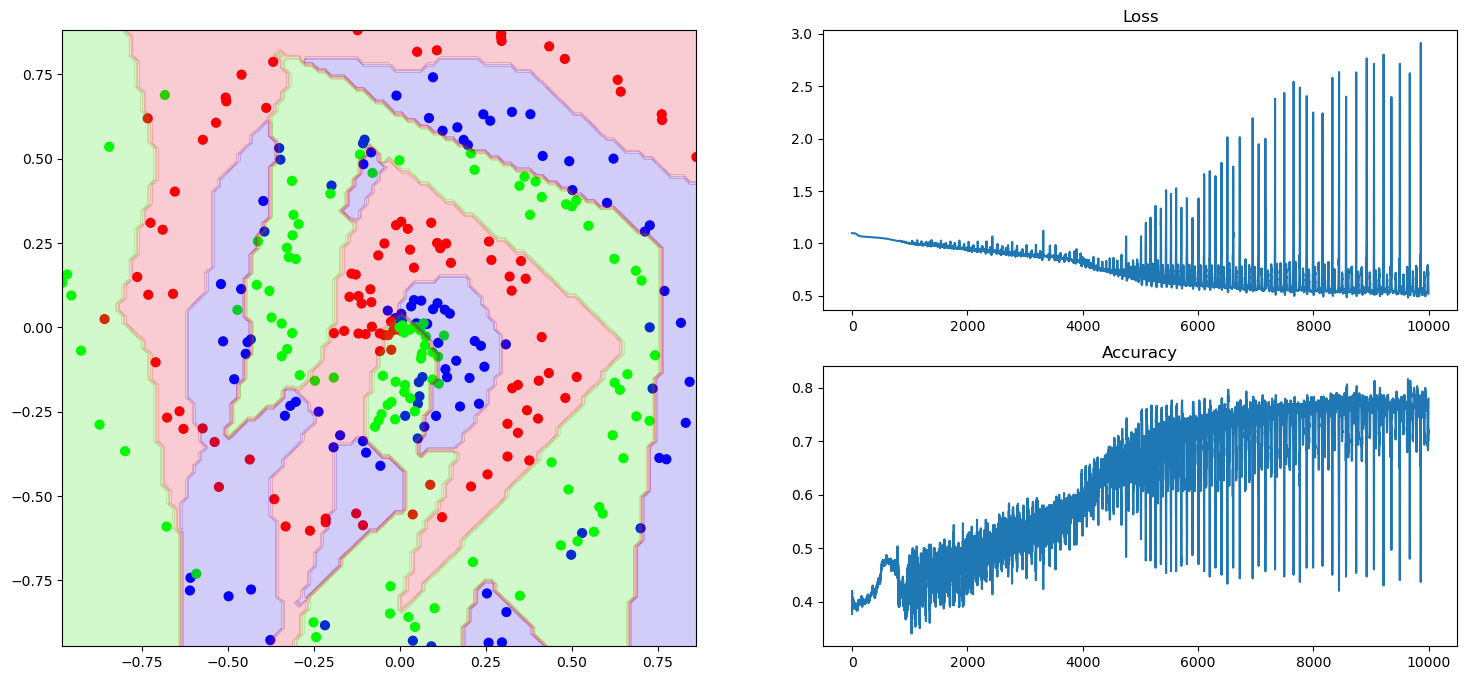

In [61]:
# let's visualize the data and predictions as well as loss and accuracy over time

# one plot on the left and two on the right
fig= plt.figure(figsize=(18, 8))
# ax1 spans two rows and one column
ax1 = fig.add_subplot(121)
# ax2 and ax3 are on the right
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)


# plot the data
ax1.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')

# plot the decision boundary
res = 100 # resolution of the grid
x_span = np.linspace(min(X[:, 0]), max(X[:, 0]), res)
y_span = np.linspace(min(X[:, 1]), max(X[:, 1]), res)
xx, yy = np.meshgrid(x_span, y_span)
grid = np.c_[xx.ravel(), yy.ravel()]
dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
# convert probabilities to rgb
rgb = np.argmax(dense2.output, axis=1)
rgb = rgb.reshape(xx.shape)
ax1.contourf(xx, yy, rgb, cmap='brg', alpha=0.2)

# plot the loss
ax2.plot(losses)
ax2.set_title('Loss')

# plot the accuracy
ax3.plot(accuracies)
ax3.set_title('Accuracy')

plt.show()

## Learning rate

Let's take a look at how the learning rate affects the training process. We'll use the same model as before, but we'll change the learning rate to 0.1 first

In [62]:
### Model generation ###
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64, seed=1) # seed is for reproducibility

# Create ReLU activation
activation1 = Activation_ReLU()

# Second Dense layer with 64 inputs (from previous layer) and 3 outputs (our 3 classes)
dense2 = Layer_Dense(64, 3, seed=1)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(.1)

# Training data
X, y = spiral_data(100, classes=3, seed=123)

# save losses and accuracies for plotting later
losses = []
accuracies = []

# Train in loop
pbar=tqdm.trange(10000, desc='Epoch')
for i in pbar:
    # forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    losses.append(loss)

    # calculate accuracy from output of activation2 and targets
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    accuracies.append(accuracy)

    # update progress bar every 100 iterations (otherwise it will be slow)
    if (i+1)%100==0:
        pbar.set_postfix({'loss':loss, 'acc':accuracy})

    # backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

Epoch: 100%|██████████| 10000/10000 [00:09<00:00, 1027.72it/s, loss=1.03, acc=0.48]


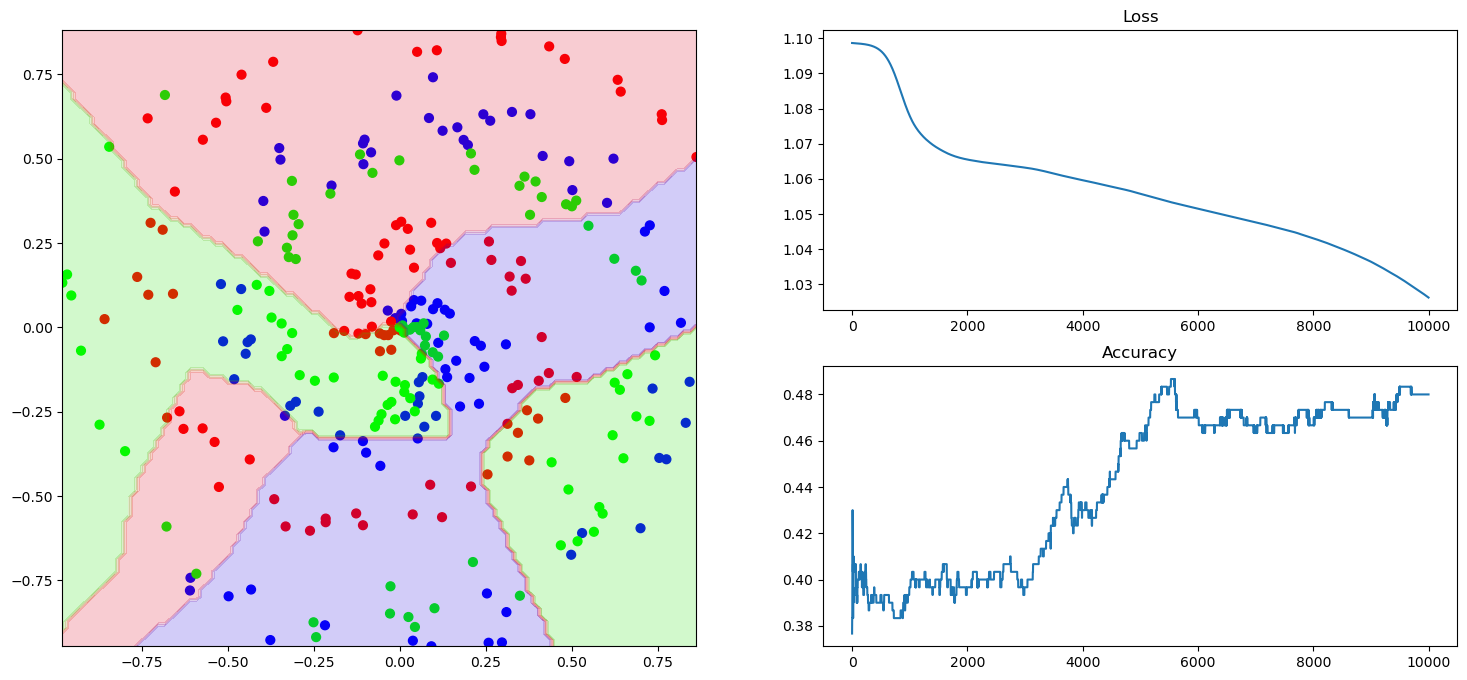

In [63]:
# let's visualize the data and predictions as well as loss and accuracy over time

# one plot on the left and two on the right
fig= plt.figure(figsize=(18, 8))
# ax1 spans two rows and one column
ax1 = fig.add_subplot(121)
# ax2 and ax3 are on the right
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)


# plot the data
ax1.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')

# plot the decision boundary
res = 100 # resolution of the grid
x_span = np.linspace(min(X[:, 0]), max(X[:, 0]), res)
y_span = np.linspace(min(X[:, 1]), max(X[:, 1]), res)
xx, yy = np.meshgrid(x_span, y_span)
grid = np.c_[xx.ravel(), yy.ravel()]
dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
# convert probabilities to rgb
rgb = np.argmax(dense2.output, axis=1)
rgb = rgb.reshape(xx.shape)
ax1.contourf(xx, yy, rgb, cmap='brg', alpha=0.2)

# plot the loss
ax2.plot(losses)
ax2.set_title('Loss')

# plot the accuracy
ax3.plot(accuracies)
ax3.set_title('Accuracy')

plt.show()

Now let's increase the learning rate to 4

In [64]:
### Model generation ###
# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64, seed=1) # seed is for reproducibility

# Create ReLU activation
activation1 = Activation_ReLU()

# Second Dense layer with 64 inputs (from previous layer) and 3 outputs (our 3 classes)
dense2 = Layer_Dense(64, 3, seed=1)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD(4)

# Training data
X, y = spiral_data(100, classes=3, seed=123)

# save losses and accuracies for plotting later
losses = []
accuracies = []

# Train in loop
pbar=tqdm.trange(10000, desc='Epoch')
for i in pbar:
    # forward pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    losses.append(loss)

    # calculate accuracy from output of activation2 and targets
    predictions = np.argmax(loss_activation.output, axis=1)
    if len(y.shape) == 2:
        y = np.argmax(y, axis=1)
    accuracy = np.mean(predictions==y)

    accuracies.append(accuracy)

    # update progress bar every 100 iterations (otherwise it will be slow)
    if (i+1)%100==0:
        pbar.set_postfix({'loss':loss, 'acc':accuracy})

    # backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

Epoch: 100%|██████████| 10000/10000 [00:09<00:00, 1038.27it/s, loss=0.591, acc=0.71]


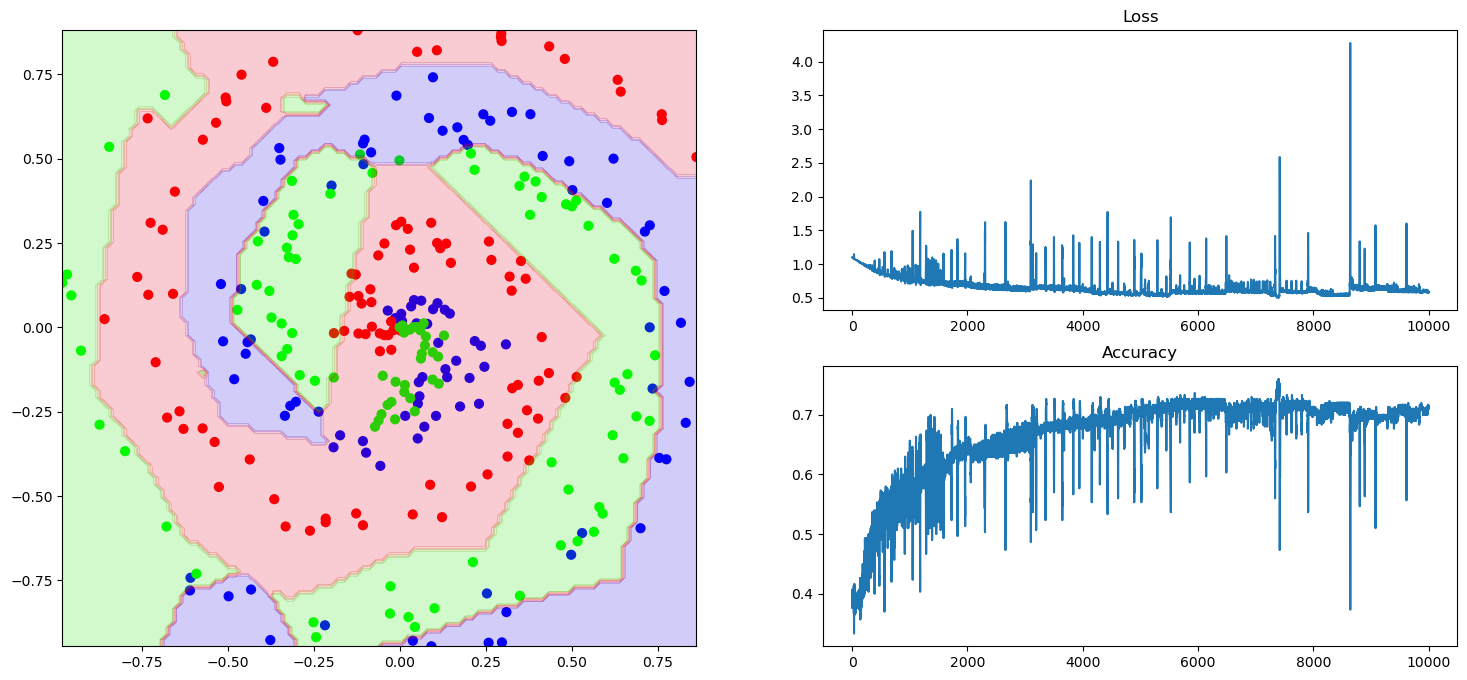

In [65]:
# let's visualize the data and predictions as well as loss and accuracy over time

# one plot on the left and two on the right
fig= plt.figure(figsize=(18, 8))
# ax1 spans two rows and one column
ax1 = fig.add_subplot(121)
# ax2 and ax3 are on the right
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)


# plot the data
ax1.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')

# plot the decision boundary
res = 100 # resolution of the grid
x_span = np.linspace(min(X[:, 0]), max(X[:, 0]), res)
y_span = np.linspace(min(X[:, 1]), max(X[:, 1]), res)
xx, yy = np.meshgrid(x_span, y_span)
grid = np.c_[xx.ravel(), yy.ravel()]
dense1.forward(grid)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
# convert probabilities to rgb
rgb = np.argmax(dense2.output, axis=1)
rgb = rgb.reshape(xx.shape)
ax1.contourf(xx, yy, rgb, cmap='brg', alpha=0.2)

# plot the loss
ax2.plot(losses)
ax2.set_title('Loss')

# plot the accuracy
ax3.plot(accuracies)
ax3.set_title('Accuracy')

plt.show()

Some things to note:

When we have a lower learning rate, the model takes longer to converge. This is because the model is taking smaller steps in the right direction. However, the model is more likely to find the global minimum, but can also get stuck in a local minimum.

When we have a higher learning rate, the model may not converge at all. This is because the model is taking too large of steps in the wrong direction. We can see that our model cannot really home into the center of the spiral. This is because the model is overshooting the minimum.

So you might think why not start with a larger learning rate and then decrease it as we train? Well, that is exactly what we will do next!

But first, let's make a general model class that makes it easier to create and train models!

In [66]:
# a model class that will hold all the layers and the optimizer and has a forward and backward method as well as a train method

class Model:
    def __init__(self, optimizer = Optimizer_SGD()):
        self.layers = []
        self.optimizer = optimizer
        self.losses = []
        self.accuracies = []

    def add(self, layer):
        # We can add layers to the model and store them in a list
        self.layers.append(layer)

    def forward(self, X, y):
        # This will call the forward method of each layer in the model. The last layer is expected to be the loss layer that will return the loss.
        self.output = X
        for layer in self.layers[:-1]:
            layer.forward(self.output)
            self.output = layer.output
        self.loss = self.layers[-1].forward(self.output, y)
        self.losses.append(self.loss)
        self.output = self.layers[-1].output
        return self.loss
    
    def backward(self, y, loss):
        # This will call the backward method of each layer in the model. Note that we loop backwards through the layers. loss is the loss returned by the forward method.
        self.layers[-1].backward(self.output, y)
        loss = self.layers[-1].dinputs
        for layer in reversed(self.layers[:-1]):
            layer.backward(loss)
            loss = layer.dinputs
    
    def train(self, X, y, epochs=1, print_every=1):
        # This will call the forward and backward methods for each epoch and print the loss and accuracy every print_every epochs.
        # It will also update the parameters of the layers using the optimizer.
        for epoch in range(1, epochs+1):
            # forward pass
            loss = self.forward(X, y)

            # backward pass
            self.backward(y,loss)

            # update parameters
            if hasattr(self.optimizer, 'pre_update_params'): # see later
                self.optimizer.pre_update_params()
            for layer in self.layers:
                if hasattr(layer, 'weights'):
                    # the actual update
                    self.optimizer.update_params(layer)
            if hasattr(self.optimizer, 'post_update_params'): # see later
                self.optimizer.post_update_params()

            # save accuracy
            self.accuracies.append(np.mean(np.argmax(self.output, axis=1) == y))

            # print loss and accuracy every print_every epochs
            if epoch % print_every == 0:
                print(f'epoch: {epoch}, ' +
                      f'acc: {self.accuracies[-1]:.3f}, ' +
                      f'loss: {loss:.3f}, ' +
                      f'lr: {self.optimizer.current_learning_rate}')
                
    def predict_proba(self, X):
        # Once the model is trained, we can feed new data forward through the model to get predictions.
        output = X
        for layer in self.layers[:-1]:
            layer.forward(output)
            output = layer.output
        return output
    
    def predict(self, X):
        # We can also get the class predictions by taking the argmax of the output of the model.
        # e.g if the output is [0.1, 0.2, 0.7], argmax will return the index of the largest value, which is 2. So the prediction is class 2.
        return np.argmax(self.predict_proba(X), axis=1)

In [67]:
model=Model(Optimizer_SGD(4))
model.add(Layer_Dense(2, 64, seed=1))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 3, seed=1))
model.add(Activation_Softmax_Loss_CategoricalCrossentropy())

X, y = spiral_data(100, classes=3, seed=123)

model.train(X, y, epochs=10000, print_every=1000)


epoch: 1000, acc: 0.630, loss: 0.771, lr: 4
epoch: 2000, acc: 0.643, loss: 0.677, lr: 4
epoch: 3000, acc: 0.640, loss: 0.618, lr: 4
epoch: 4000, acc: 0.677, loss: 0.670, lr: 4
epoch: 5000, acc: 0.700, loss: 0.560, lr: 4
epoch: 6000, acc: 0.710, loss: 0.582, lr: 4
epoch: 7000, acc: 0.717, loss: 0.580, lr: 4
epoch: 8000, acc: 0.707, loss: 0.600, lr: 4
epoch: 9000, acc: 0.703, loss: 0.621, lr: 4
epoch: 10000, acc: 0.710, loss: 0.591, lr: 4


In [68]:
# Let's also create a function that will plot the decision boundary of the model, the loss and the accuracy

def plot_model_info(model, X,y):
    # one plot on the left and two on the right
    fig= plt.figure(figsize=(18, 8))
    # ax1 spans two rows and one column
    ax1 = fig.add_subplot(121)
    # ax2 and ax3 are on the right
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(224)


    # plot the data
    ax1.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')

    # plot the decision boundary
    res = 100 # resolution of the grid
    x_span = np.linspace(min(X[:, 0]), max(X[:, 0]), res)
    y_span = np.linspace(min(X[:, 1]), max(X[:, 1]), res)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    rgb = model.predict(grid)
    rgb = rgb.reshape(xx.shape)
    ax1.contourf(xx, yy, rgb, cmap='brg', alpha=0.2)

    # plot the loss
    ax2.plot(model.losses)
    ax2.set_title('Loss')

    # plot the accuracy
    ax3.plot(model.accuracies)
    ax3.set_title('Accuracy')

    plt.show()

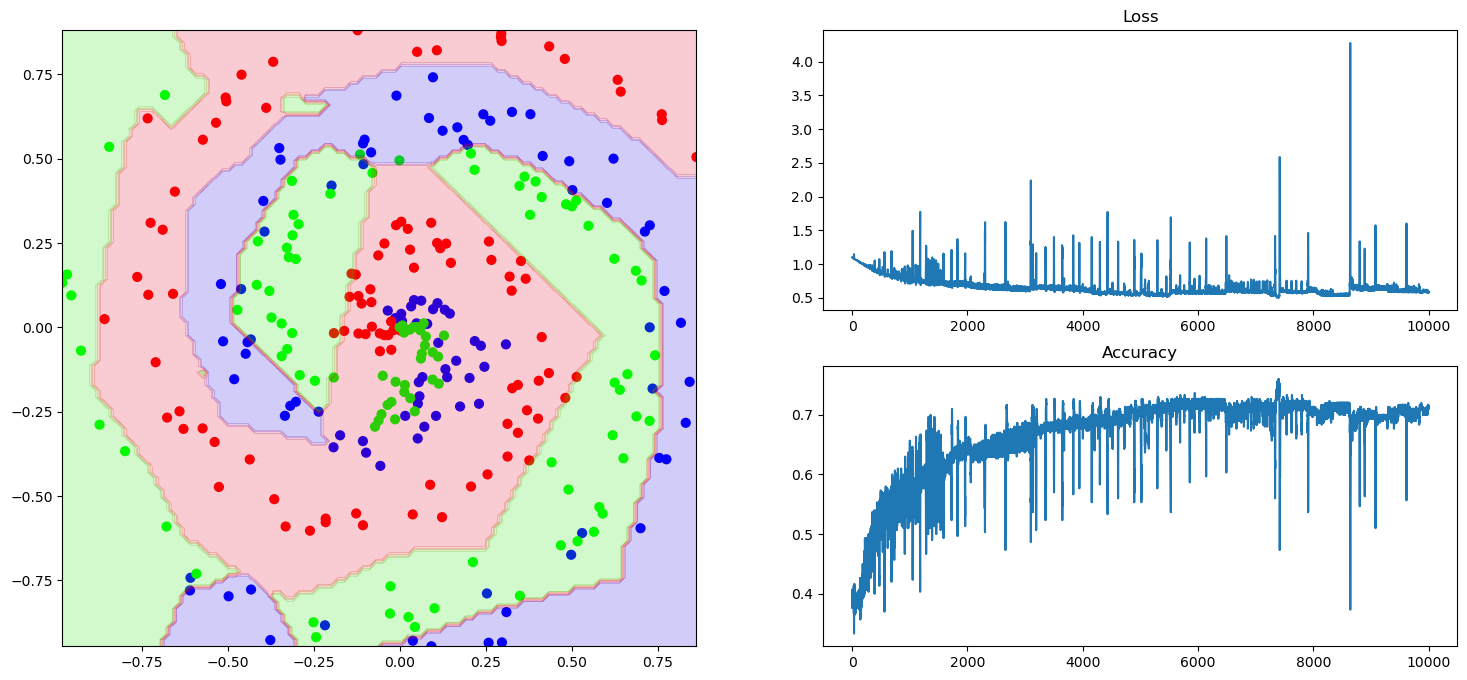

In [69]:
plot_model_info(model, X, y)

Same results as before, but now we can create and train a model way easier!

## Learning rate decay

Learning rate decay is a technique that decreases the learning rate as we train. This is useful because we can start with a large learning rate and then decrease it as we train. This allows us to converge faster and find the global minimum.

We can use the following formula to calculate the learning rate:

$$ \text{learning rate} = \frac{\text{initial learning rate}}{\text{1 + decay rate * epoch}} $$

Let's do an example calculation for 10 epochs with an initial learning rate of 1 and a decay rate of 0.01

$$ \text{learning rate} = \frac{1}{1 + 0.01 * 1} = 0.99 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 2} = 0.98 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 3} = 0.97 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 4} = 0.96 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 5} = 0.95 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 6} = 0.94 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 7} = 0.93 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 8} = 0.92 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 9} = 0.91 $$
$$ \text{learning rate} = \frac{1}{1 + 0.01 * 10} = 0.90 $$

Let's implement this in our SGD optimizer

In [70]:
class Optimizer_SGD:
    def __init__(self, learning_rate=1., decay=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    def pre_update_params(self):
        # calculate current learning rate
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)

    def update_params(self, layer):
        # update weights and biases
        layer.weights += -self.current_learning_rate * layer.dweights
        layer.biases += -self.current_learning_rate * layer.dbiases

    def post_update_params(self):
        # increment iteration number
        self.iterations += 1

epoch: 1000, acc: 0.470, loss: 1.040, lr: 0.5002501250625312
epoch: 2000, acc: 0.507, loss: 0.999, lr: 0.33344448149383127
epoch: 3000, acc: 0.453, loss: 0.993, lr: 0.25006251562890724
epoch: 4000, acc: 0.453, loss: 0.973, lr: 0.2000400080016003
epoch: 5000, acc: 0.487, loss: 0.947, lr: 0.16669444907484582
epoch: 6000, acc: 0.527, loss: 0.908, lr: 0.1428775539362766
epoch: 7000, acc: 0.547, loss: 0.869, lr: 0.12501562695336915
epoch: 8000, acc: 0.600, loss: 0.830, lr: 0.11112345816201799
epoch: 9000, acc: 0.633, loss: 0.796, lr: 0.1000100010001
epoch: 10000, acc: 0.667, loss: 0.759, lr: 0.09091735612328393


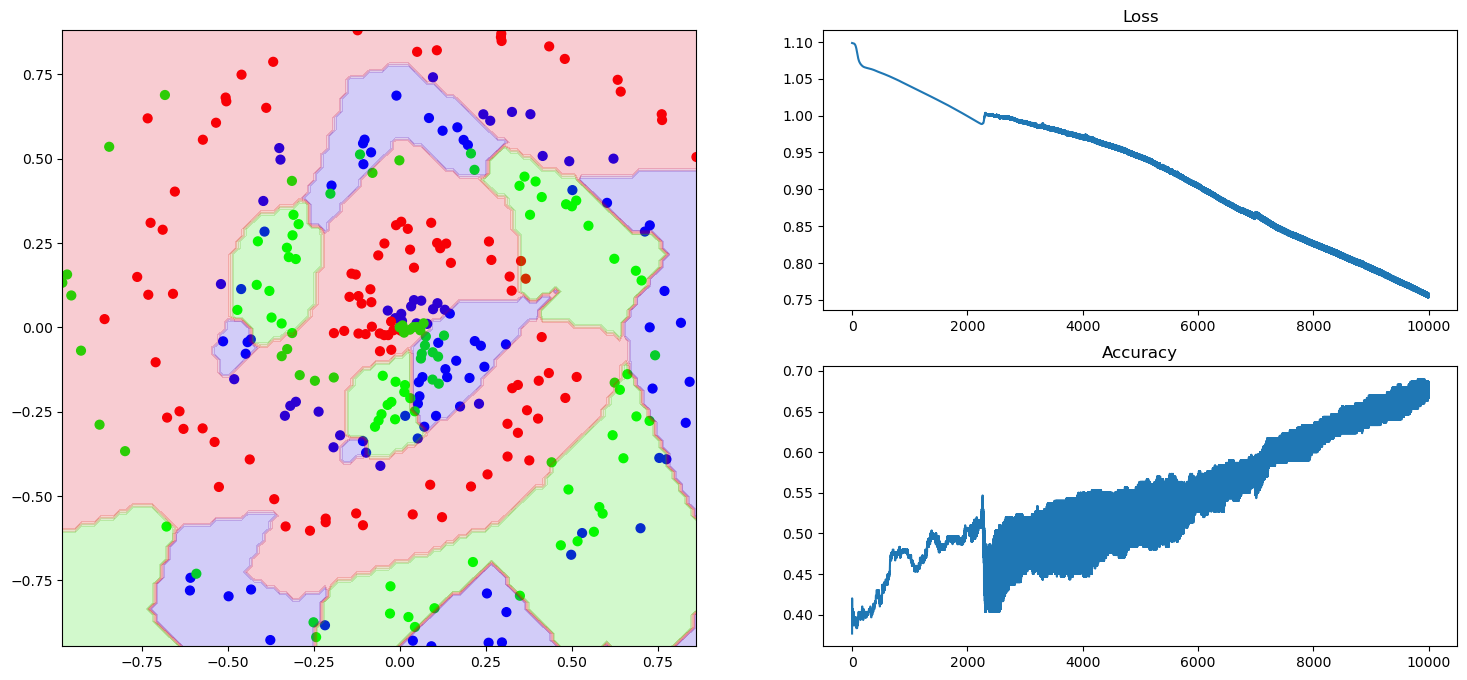

In [71]:
model=Model(Optimizer_SGD(decay=1e-3)) # 0.001
model.add(Layer_Dense(2, 64, seed=1))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 3, seed=1))
model.add(Activation_Softmax_Loss_CategoricalCrossentropy())

X, y = spiral_data(100, classes=3, seed=123)

model.train(X, y, epochs=10000, print_every=1000)

plot_model_info(model, X, y)

We are getting there, however we have one more thing to resolve. We are still getting stuck in local minima quite often. Let's see if we can fix that!

Let's show what the problem is by plotting a fictitious loss function based on parameter a

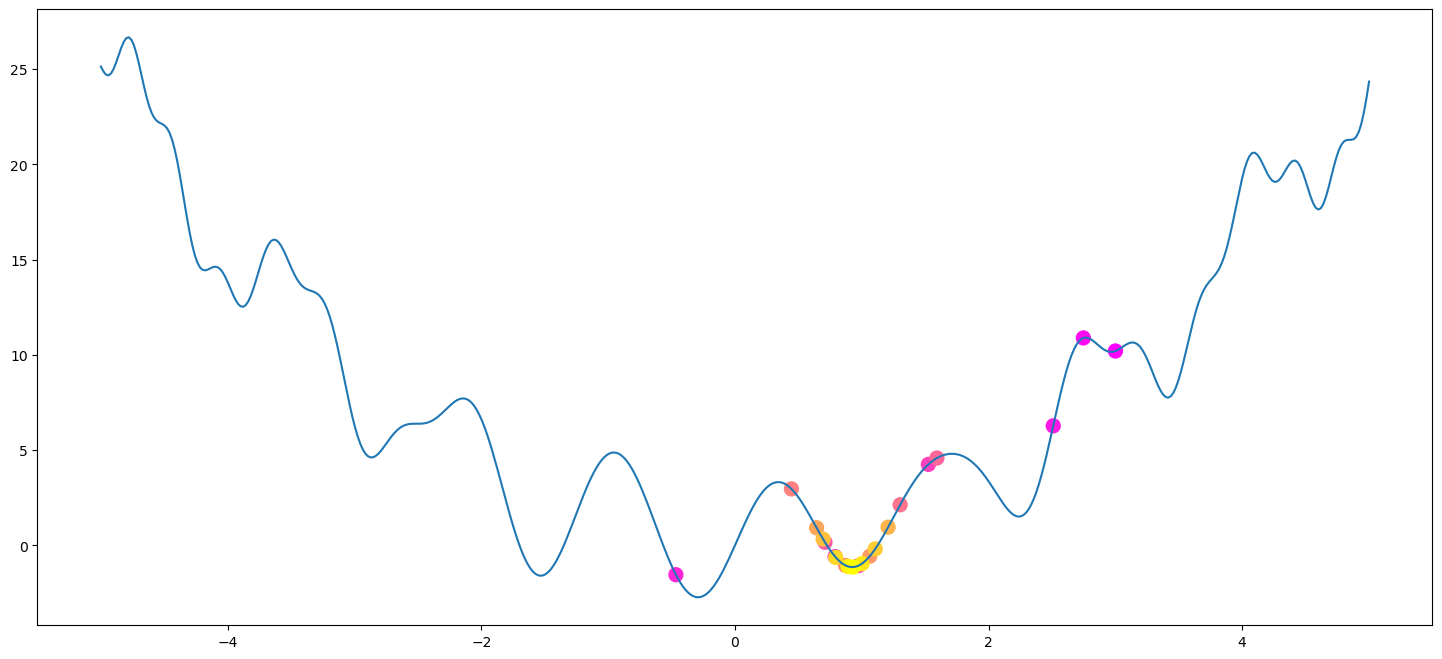

In [72]:
def f(x):
    # fictious function we want to minimize with multiple local minima
    return x**2 + np.sin(2*x**2) + 3* np.sin(5*x)

def df(x):
    # derivative of f
    return 4*x*np.cos(2*x**2) + 2*x + 15*np.cos(5*x)
# plot it

fig= plt.figure(figsize=(18, 8))
ax= fig.add_subplot(111)

x = np.linspace(-5, 5, 500)
y = f(x)
ax.plot(x, y)

# plot a few steps of gradient descent
xs=[3]
init_lr = 0.1
lr = init_lr
decay = 0.01
for i in range(20):
    # calculate gradient
    grad = df(xs[-1])
    # update x with gradient
    xs.append(xs[-1] - lr * grad)
    # decay learning rate
    lr *= 1/(1+decay*i)

# plot the steps
colors= plt.cm.spring(np.linspace(0, 1, len(xs)))
coords=[(x, f(x)) for x in xs]
ax.scatter(*zip(*coords), c=colors, s=100)

plt.show()

as you can see, we are getting stuck in a local minimum (goes from purple to yellow, the most yellow dot is the spot where we are stuck). We can fix this by adding momentum to our optimizer.

## Momentum

Momentum is a technique that helps us avoid getting stuck in local minima. It does this by adding a fraction of the previous update to the current update. This allows us to keep moving in the right direction and "roll" over the local minimum.

We can implement this by adding a momentum term to our optimizer:

$$ \text{layer momentum} = \text{momentum} * \text{layer momentum} - \text{learning rate} * \text{layer gradient} $$

So you can see that we are adding a fraction of the previous update (layer momentum) to the current update (layer gradient). This allows us to keep moving in the right direction and "roll" over the local minimum.

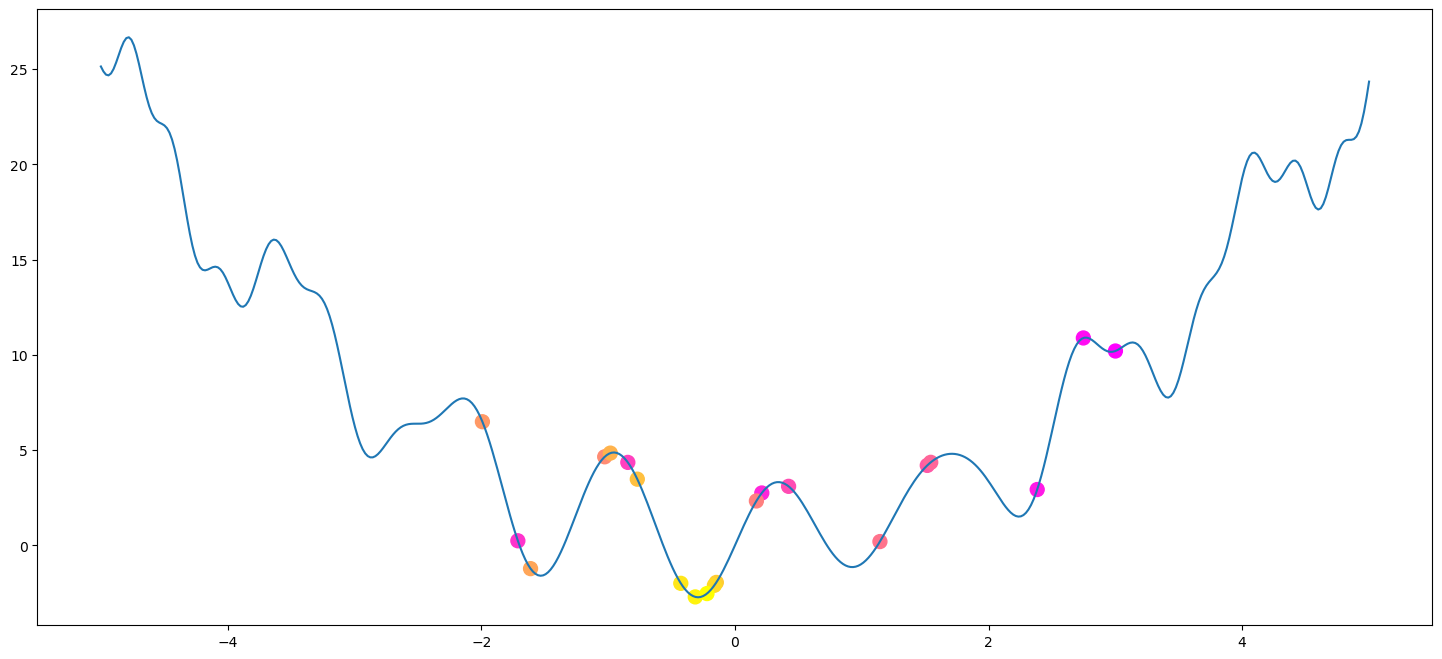

In [73]:
def f(x):
    # fictious function we want to minimize with multiple local minima
    return x**2 + np.sin(2*x**2) + 3* np.sin(5*x)

def df(x):
    # derivative of f
    return 4*x*np.cos(2*x**2) + 2*x + 15*np.cos(5*x)
# plot it

fig= plt.figure(figsize=(18, 8))
ax= fig.add_subplot(111)

x = np.linspace(-5, 5, 500)
y = f(x)
ax.plot(x, y)

# plot a few steps of gradient descent
xs=[3]
momentum = 0.5
init_lr = 0.1
lr = init_lr
decay = 0.01

for i in range(20):
    # calculate gradient
    grad = df(xs[-1])

    # momentum
    if len(xs) == 1:
        dx = -lr * grad
    else:
        dx = momentum * dx - lr * grad

    # update x with gradient
    xs.append(xs[-1] + dx)

    # decay learning rate
    lr *= 1/(1+decay*i)

# plot the steps
colors= plt.cm.spring(np.linspace(0, 1, len(xs)))
coords=[(x, f(x)) for x in xs]
ax.scatter(*zip(*coords), c=colors, s=100)

plt.show()

In [74]:
class Optimizer_SGD:

    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        # calculate current learning rate
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)

    def update_params(self, layer):
        # update weights and biases

        # if momentum is used
        if self.momentum:
            # if layer does not contain momentum arrays, create them filled with zeros (first iteration)
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            # weight momentum update + calculated current weights updates
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # same but for biases
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # the actual update
        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1

epoch: 1000, acc: 0.527, loss: 0.883, lr: 0.5002501250625312
epoch: 2000, acc: 0.857, loss: 0.290, lr: 0.33344448149383127
epoch: 3000, acc: 0.860, loss: 0.262, lr: 0.25006251562890724
epoch: 4000, acc: 0.863, loss: 0.251, lr: 0.2000400080016003
epoch: 5000, acc: 0.867, loss: 0.245, lr: 0.16669444907484582
epoch: 6000, acc: 0.867, loss: 0.239, lr: 0.1428775539362766
epoch: 7000, acc: 0.873, loss: 0.236, lr: 0.12501562695336915
epoch: 8000, acc: 0.877, loss: 0.234, lr: 0.11112345816201799
epoch: 9000, acc: 0.877, loss: 0.232, lr: 0.1000100010001
epoch: 10000, acc: 0.877, loss: 0.231, lr: 0.09091735612328393


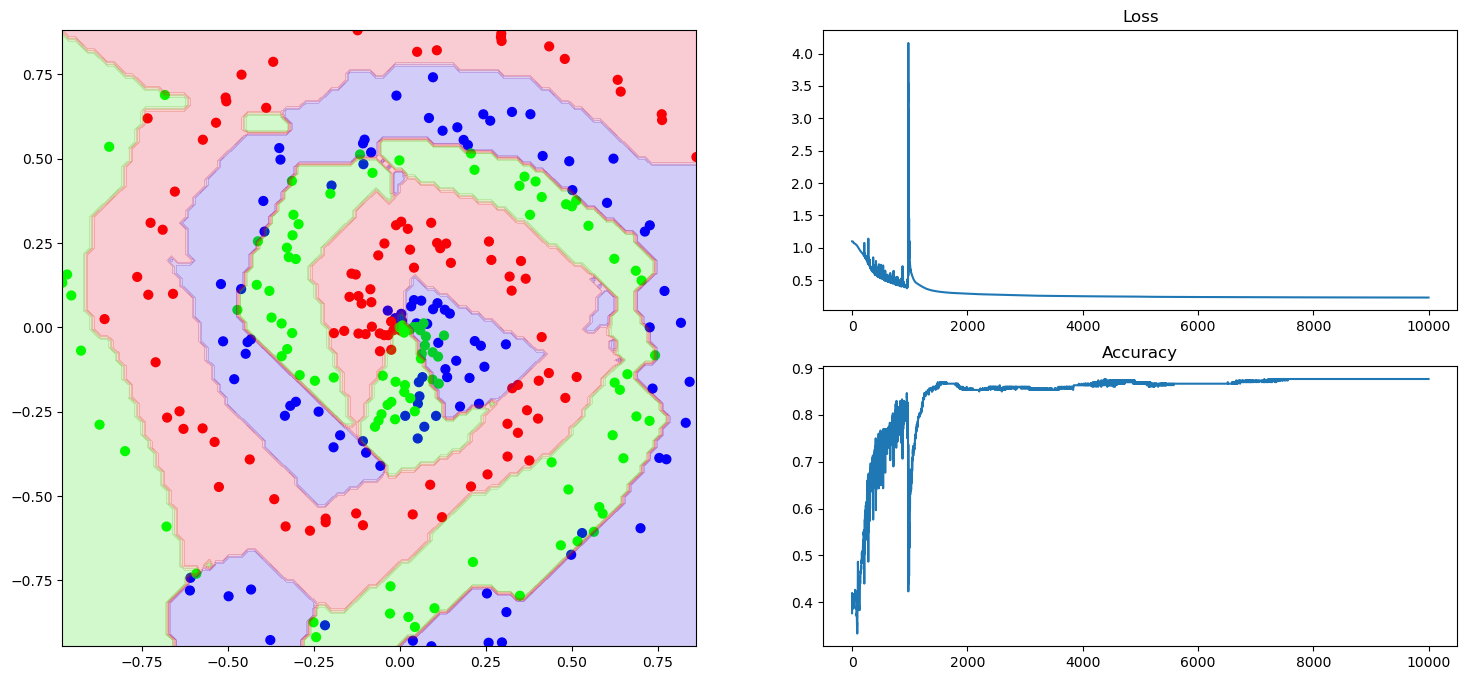

In [75]:
model=Model(Optimizer_SGD(decay=1e-3, momentum=0.9)) # added momentum
model.add(Layer_Dense(2, 64, seed=1))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 3, seed=1))
model.add(Activation_Softmax_Loss_CategoricalCrossentropy())

X, y = spiral_data(100, classes=3, seed=123)

model.train(X, y, epochs=10000, print_every=1000)

plot_model_info(model, X, y)

## Optimizing our optimizers 😏

SGD is a very simple optimizer, note that for example the learning rate is fixed for all parameters. This means that we can't have different learning rates for different parameters. This is where more advanced optimizers come in. We will look at some of these in the next section.

### AdaGrad

AdaGrad is an optimizer that adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters. This is useful because we can have different learning rates for different parameters.

The idea is some parameters change more than others, resulting in very high or very low gradients for some parameters, and almost zero gradients for others. So the bigger the gradient, the smaller we will make the update. Small gradients will result in larger updates causing all parameters to be updated in a similar way.

We can implement this by adding a cache term to our optimizer that holds the sum of the squared gradients:

$$ \text{layer cache} = \text{layer cache} + \text{layer gradient}^2 $$

$$ \text{layer update} = \frac{\text{learning rate}}{\sqrt{\text{layer cache}} + \epsilon} * \text{layer gradient} $$

The epsilon term is a hyperparameter that is mainly used to prevent division by zero. But it can also be used to prevent the learning rate from becoming too small. By default this is most of the time set to 1e-7.

In [76]:
class Optimizer_AdaGrad:
    def __init__(self, learning_rate=1., decay=0., epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    def pre_update_params(self):
        # calculate current learning rate
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)

    def update_params(self, layer):
        # first time, create cache arrays filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # update cache with squared current gradients
        layer.weight_cache += layer.dweights**2
        layer.bias_cache += layer.dbiases**2

        # SGD parameter update + normalization with square rooted cache (adagrad)
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

epoch: 1000, acc: 0.673, loss: 0.608, lr: 0.9091735612328392
epoch: 2000, acc: 0.770, loss: 0.496, lr: 0.8334027835652972
epoch: 3000, acc: 0.783, loss: 0.459, lr: 0.7692899453804138
epoch: 4000, acc: 0.793, loss: 0.436, lr: 0.7143367383384527
epoch: 5000, acc: 0.807, loss: 0.420, lr: 0.6667111140742716
epoch: 6000, acc: 0.827, loss: 0.408, lr: 0.6250390649415589
epoch: 7000, acc: 0.833, loss: 0.397, lr: 0.5882698982293076
epoch: 8000, acc: 0.840, loss: 0.382, lr: 0.5555864214678593
epoch: 9000, acc: 0.840, loss: 0.363, lr: 0.5263434917627243
epoch: 10000, acc: 0.860, loss: 0.349, lr: 0.5000250012500626


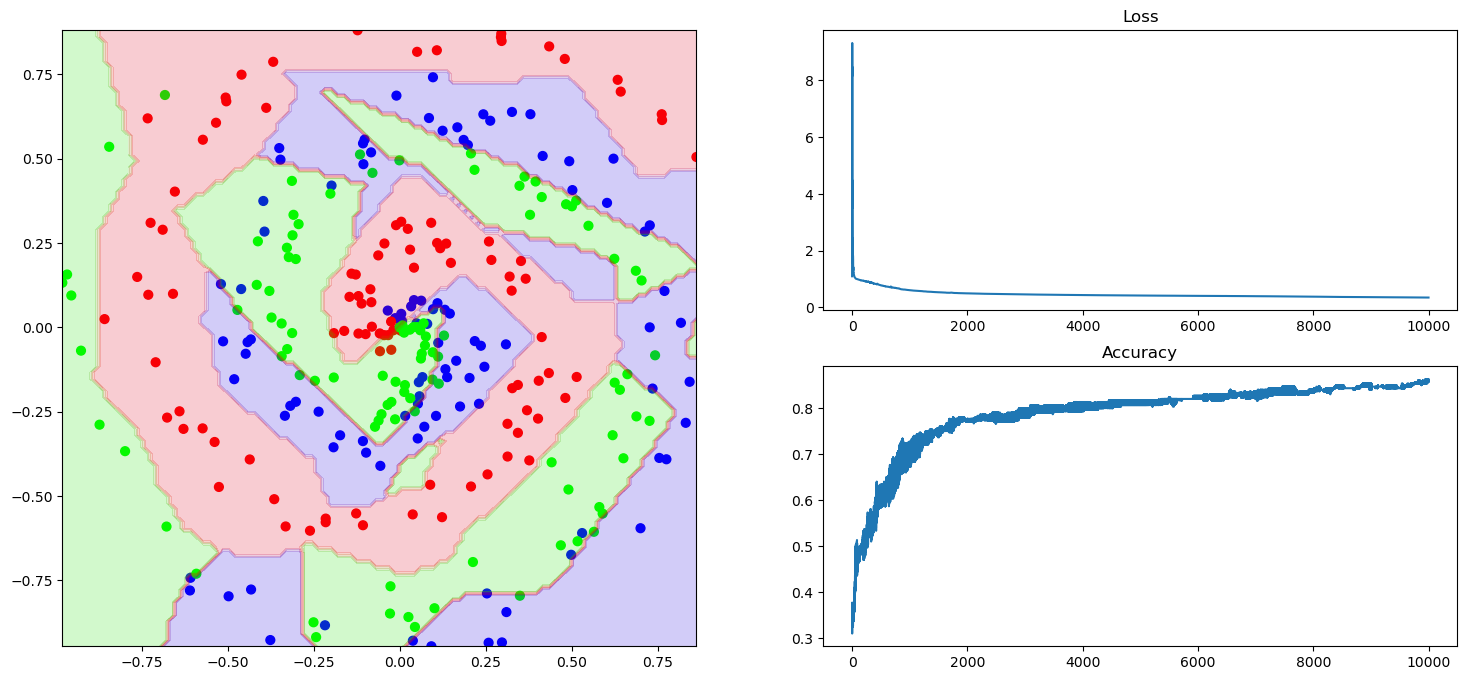

In [77]:
model=Model(Optimizer_AdaGrad(decay=1e-4)) 
model.add(Layer_Dense(2, 64, seed=1))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 3, seed=1))
model.add(Activation_Softmax_Loss_CategoricalCrossentropy())

X, y = spiral_data(100, classes=3, seed=123)

model.train(X, y, epochs=10000, print_every=1000)

plot_model_info(model, X, y)


Look at how the model is not as good as when we used SGD with momentum, this is because we inhibit the parameters from getting too big.

### RMSProp

RMSProp is an optimizer that is very similar to AdaGrad, but it has a different way of calculating the cache. It uses an exponentially weighted average of the squared gradients. This is kinda similar to momentum, but instead of using the previous update, it uses the previous squared gradients.

AdaGrad used the following formula to calculate the cache:

$$ \text{layer cache} = \text{layer cache} + \text{layer gradient}^2 $$

RMSProp uses the following formula to calculate the cache:

$$ \text{layer cache} = \text{rho} * \text{layer cache} + (1 - \text{rho}) * \text{layer gradient}^2 $$

The rho term is a hyperparameter that is used to determine how much we want to weight the previous squared gradients. By default this is set to 0.9. It is also called the decay rate.

Since we use this cache, we will also lower the default learning rate to 0.001

In [78]:
class Optimizer_RMSprop:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    def pre_update_params(self):
        # calculate current learning rate
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)

    def update_params(self, layer):
        # first time, create cache arrays filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        # update cache with squared current gradients
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2

        # SGD parameter update + normalization with square rooted cache (adagrad)
        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

epoch: 1000, acc: 0.740, loss: 0.667, lr: 0.009091735612328393
epoch: 2000, acc: 0.770, loss: 0.530, lr: 0.008334027835652971
epoch: 3000, acc: 0.807, loss: 0.433, lr: 0.007692899453804139
epoch: 4000, acc: 0.817, loss: 0.392, lr: 0.007143367383384527
epoch: 5000, acc: 0.867, loss: 0.359, lr: 0.006667111140742716
epoch: 6000, acc: 0.873, loss: 0.342, lr: 0.006250390649415589
epoch: 7000, acc: 0.867, loss: 0.325, lr: 0.005882698982293076
epoch: 8000, acc: 0.887, loss: 0.310, lr: 0.005555864214678593
epoch: 9000, acc: 0.887, loss: 0.299, lr: 0.005263434917627243
epoch: 10000, acc: 0.887, loss: 0.292, lr: 0.005000250012500625


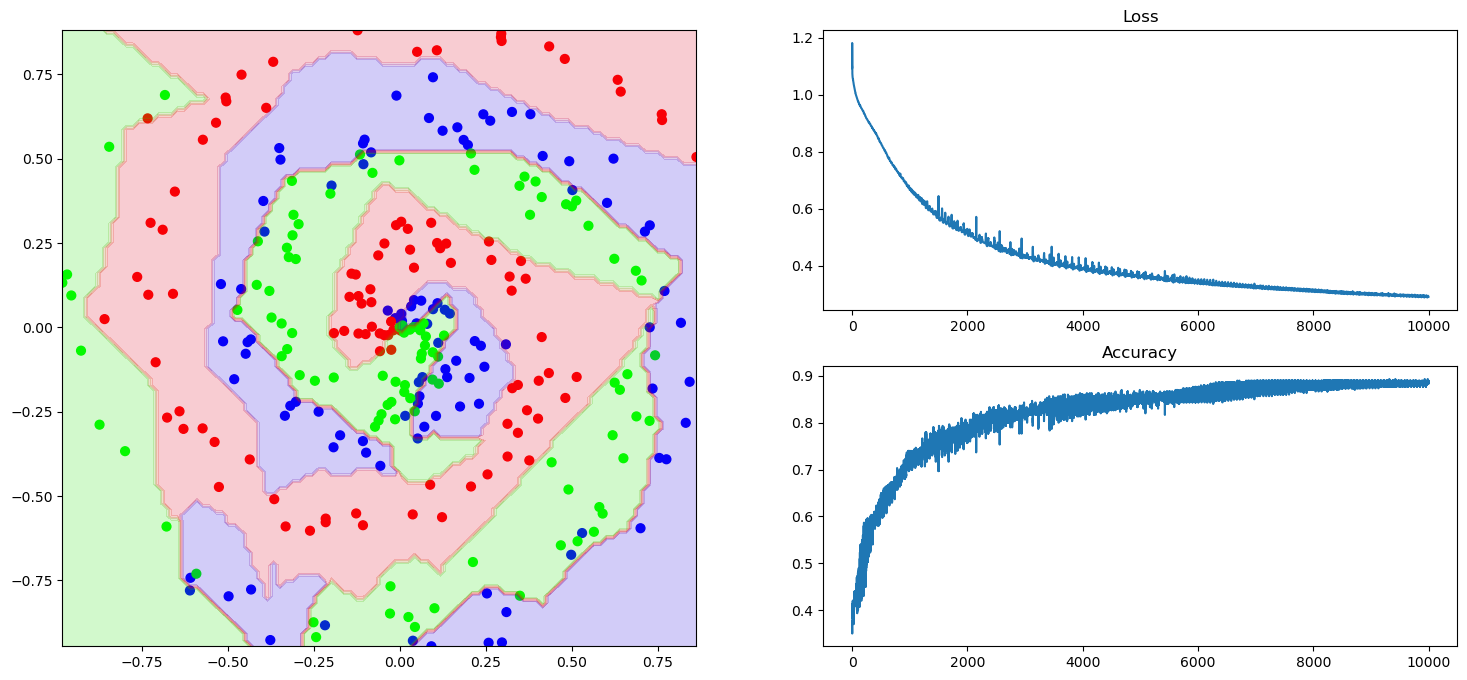

In [79]:
model=Model(Optimizer_RMSprop(learning_rate=0.01, decay=1e-4, rho=0.990)) # playing around with some of the parameters

model.add(Layer_Dense(2, 64, seed=1))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 3, seed=1))
model.add(Activation_Softmax_Loss_CategoricalCrossentropy())

X, y = spiral_data(100, classes=3, seed=123)

model.train(X, y, epochs=10000, print_every=1000)

plot_model_info(model, X, y)


Getting back up there, but still not as good as with actual momentum!

### Adam

Adam is an optimizer that combines the ideas of momentum and RMSProp. It also adds in bias correction to the momentum and RMSProp terms. Basically meaning that the first few updates will be a bit smaller than otherwise would be, but this is good because in the first few updates we are still warming up the model.

To implement this correction, we divide the momentum and RMSProp terms by 1 - beta^t, where t is the current epoch and beta is the momentum or RMSProp decay rate. By default this is set to 0.9.

We have a beta 1 term for the momentum and a beta 2 term for the RMSProp cache. By default these are both set to 0.9 but we can also set them to different values.

In [80]:
class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        # calculate current learning rate
        if self.decay:
            self.current_learning_rate = self.learning_rate / (1 + self.decay * self.iterations)

    def update_params(self, layer):
        # first time, create cache arrays filled with zeros
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        # update momentum with current gradients
        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        # get corrected momentum (bias correction, not the same as the bias parameters!)
        # self.iterations is 0 at first pass thus we need to start with 1 here, otherwise we get a division by 0
        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        # update cache with squared current gradients
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        # get corrected cache
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        # vanilla SGD parameter update + normalization with square rooted cache, now with momentum and corrected bias
        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

epoch: 1000, acc: 0.903, loss: 0.228, lr: 0.06996505245629808
epoch: 2000, acc: 0.903, loss: 0.205, lr: 0.06993010486019224
epoch: 3000, acc: 0.907, loss: 0.196, lr: 0.06989519215935705
epoch: 4000, acc: 0.923, loss: 0.160, lr: 0.06986031430155405
epoch: 5000, acc: 0.937, loss: 0.133, lr: 0.069825471234649
epoch: 6000, acc: 0.950, loss: 0.129, lr: 0.06979066290661162
epoch: 7000, acc: 0.940, loss: 0.122, lr: 0.06975588926551533
epoch: 8000, acc: 0.943, loss: 0.117, lr: 0.069721150259537
epoch: 9000, acc: 0.947, loss: 0.114, lr: 0.06968644583695661
epoch: 10000, acc: 0.950, loss: 0.112, lr: 0.0696517759461572


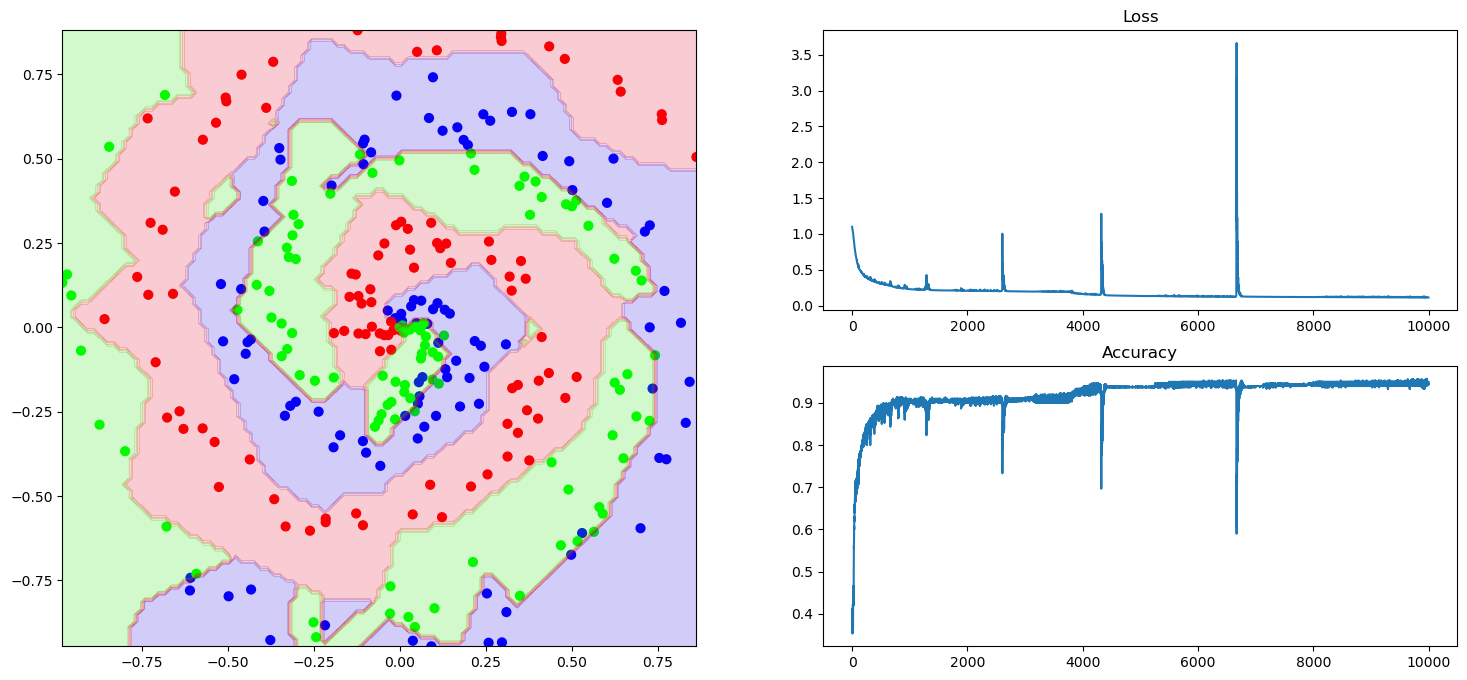

In [81]:
model=Model(Optimizer_Adam(learning_rate=0.07, decay=5e-7)) # also playing around with some of the parameters

model.add(Layer_Dense(2, 64, seed=1))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 3, seed=1))
model.add(Activation_Softmax_Loss_CategoricalCrossentropy())

X, y = spiral_data(100, classes=3, seed=123)

model.train(X, y, epochs=10000, print_every=1000)

plot_model_info(model, X, y)

# A real dataset

Let's try our model on the MNIST dataset. This is a dataset of handwritten digits. We will try to classify the digits.

In [83]:
# read and process MNIST data
with open('../data/MNIST.csv', 'r') as f:
    data = f.readlines()
    header = data[0].split(',')
    data = data[1:]
    data = [i.split(',') for i in data]
    data = np.array(data).astype('int')

X = data[:, 1:] / 255.0 # normalize pixel values to be between 0 and 1
y = data[:, 0]

epoch: 10, acc: 0.654, loss: 0.986, lr: 0.009991008092716556
epoch: 20, acc: 0.827, loss: 0.549, lr: 0.009981036031540075
epoch: 30, acc: 0.882, loss: 0.403, lr: 0.009971083856815237
epoch: 40, acc: 0.905, loss: 0.324, lr: 0.009961151509114453
epoch: 50, acc: 0.921, loss: 0.269, lr: 0.009951238929246693
epoch: 60, acc: 0.933, loss: 0.227, lr: 0.009941346058256287
epoch: 70, acc: 0.944, loss: 0.190, lr: 0.00993147283742179
epoch: 80, acc: 0.953, loss: 0.160, lr: 0.009921619208254788
epoch: 90, acc: 0.960, loss: 0.137, lr: 0.009911785112498761
epoch: 100, acc: 0.964, loss: 0.120, lr: 0.009901970492127933


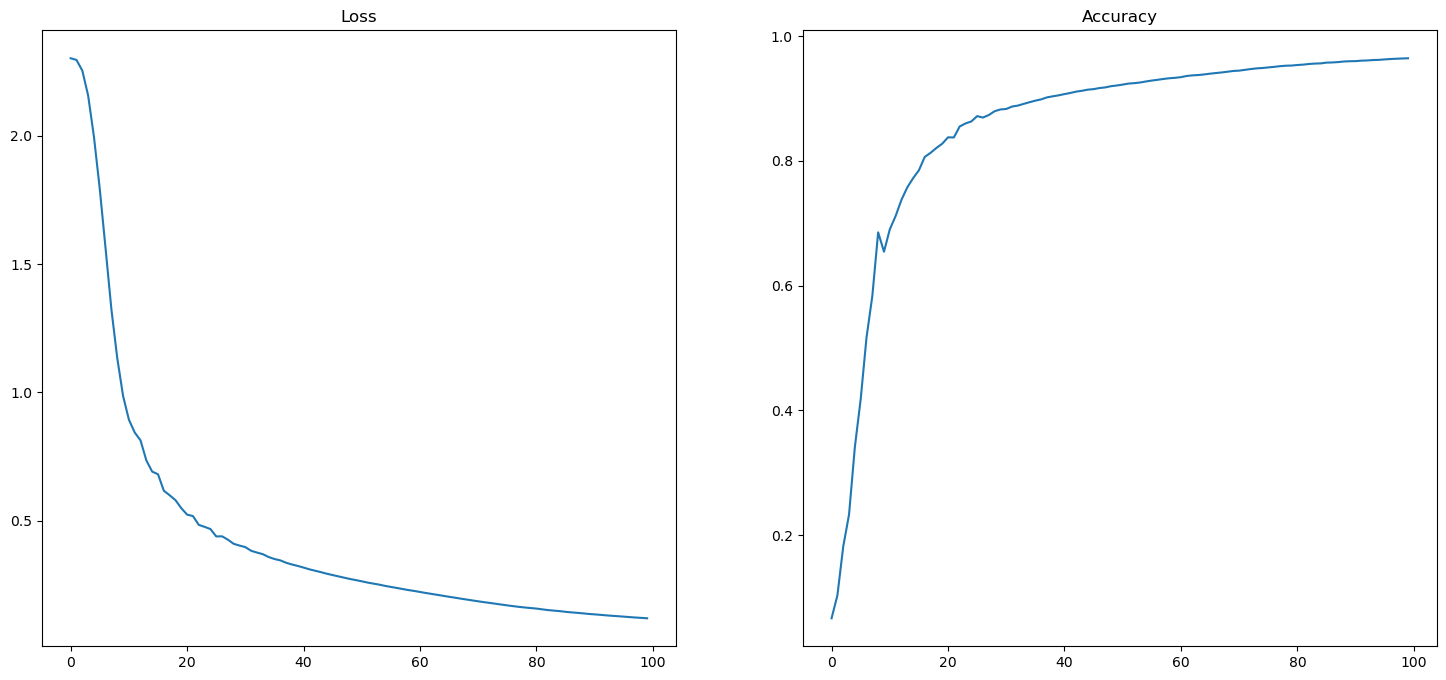

In [84]:
model=Model(Optimizer_Adam(learning_rate=0.01, decay=1e-4)) # playing around with some of the parameters
model.add(Layer_Dense(784, 64, seed=1))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 64, seed=1))
model.add(Activation_ReLU())
model.add(Layer_Dense(64, 10, seed=1))
model.add(Activation_Softmax_Loss_CategoricalCrossentropy())

model.train(X, y, epochs=100, print_every=10)

fig= plt.figure(figsize=(18, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot the loss
ax1.plot(model.losses)
ax1.set_title('Loss')

# plot the accuracy
ax2.plot(model.accuracies)
ax2.set_title('Accuracy')

plt.show()

In [85]:
predictions = model.predict(X)

possible_labels = [0,1,2,3,4,5,6,7,8,9]

scores_per_label = {i:[0]*10 for i in possible_labels}

for i,y_true in enumerate(y):
    scores_per_label[y_true][predictions[i]] += 1

scores_per_label_normalized= {i:np.array(scores_per_label[i])/np.sum(scores_per_label[i]) for i in possible_labels}

# print confusion matrix
print("Confusion report")
print("-"*50)
print("y_pred:    ", "    ".join([str(i) for i in possible_labels]))
for i in possible_labels:
    print('Label', i, np.array(scores_per_label[i]).round(2))

# print classification report
print("\nClassification report")
print("-"*50)
print(f'{"Label":<10}{"Recall":<10}{"Precision":<15}{"F1":<5}{"Support":<10}')
for i in possible_labels:
    recall = scores_per_label_normalized[i][i]
    precision = scores_per_label_normalized[i][i] / np.sum(scores_per_label_normalized[i])
    f1 = 2 * precision * recall / (precision + recall)
    print(f'    {i}       {recall:.2f}         {precision:.2f}    {f1:.2f}      {np.sum(scores_per_label[i])}')
    
# accuracy is the same as the overall accuracy
print('Accuracy:', round(np.mean(y == predictions), 2))


Confusion report
--------------------------------------------------
y_pred:     0    1    2    3    4    5    6    7    8    9
Label 0 [4044    0   11    4    6   12   23    0   24    8]
Label 1 [   0 4600   12    9    4    3    2    8   38    8]
Label 2 [  16   12 4056   16   10    3    9   29   23    3]
Label 3 [   5    7   50 4112    1   75    4   23   54   20]
Label 4 [   5    6    5    0 3947    3   19    8    5   74]
Label 5 [  26    8   12   41    9 3596   27    3   55   18]
Label 6 [  20    1    3    1    9   18 4074    0   11    0]
Label 7 [   5   16   33    7   16    5    1 4280    1   37]
Label 8 [   8   44   20   33    9   41   17   10 3853   28]
Label 9 [  18    8    1   20   94   12    0   50   26 3959]

Classification report
--------------------------------------------------
Label     Recall    Precision      F1   Support   
    0       0.98         0.98    0.98      4132
    1       0.98         0.98    0.98      4684
    2       0.97         0.97    0.97      4177
    

# Future work

We have already done a lot. But you can see that by now, we are overfitting the model. So the next step would be to prevent this. Several techniques can be used to prevent overfitting. This is something that can be done in the future. Here are things that would be interesting to try:

- Validation set
- Dropout
- L1 and L2 regularization

Other things to add in the future:

- Binary logistic regression 
    - This is a classification model that can be used to predict two classes with one output neuron (0 is one class, 1 is the other class)
- Regression
    - This is a model that can be used to predict a continuous value (e.g. the price of a house)

# Helper functions used for figures in this notebook

In [86]:
def generateSVGcode(layers:list,width:int,height:int, first_layer:bool=False, last_layer:bool=False, weights:list=None, biases:list=None, inputs:list=None, node_radius:int=20):
    """
    Generates SVG code for a neural network layer with the given number of neurons per layer.
    Creates a white circle for each neuron with a black border. The circles are arranged in a column that is centered in the middle of the image.
    The circles are spaced evenly across the height of the image.
    Lines are drawn between the circles in the previous layer and the circles in the current layer. The lines are drawn from the edges of the circles.
    """
    svg="<svg width=\""+str(width)+"\" height=\""+str(height)+"\" xmlns=\"http://www.w3.org/2000/svg\">"
    prev_layer=[]
    max_size=max(layers)
    distance_between_nodes = (height - 100)/(max_size)
    #distance_between_nodes=height/(max_size)
    distance_between_layers=(width-100)/(len(layers)-1)
    for n,neurons in enumerate(layers):
        svg+="<g>"
        prev_layer.append([])
        for i in range(neurons):
            # draw circle based on distance_between_nodes and add padding to top and bottom based on the number of nodes in the layer
            padding=(height-(distance_between_nodes*neurons))/2
            if (n != 0 and n != len(layers)-1) or (n == 0 and first_layer) or (n == len(layers)-1 and last_layer):
                svg+=f"<circle cx=\"{50+n*distance_between_layers}\" cy=\"{50+i*distance_between_nodes+padding}\" r=\"{node_radius}\" stroke=\"black\" stroke-width=\"1\" fill=\"white\"/>"
            
            # keep track of the circle positions in the previous layer so we can draw lines and text between them and the circles in the current layer
            prev_layer[n].append([50+n*distance_between_layers,50+i*distance_between_nodes+padding])
            if n > 0:
                for j in prev_layer[n-1]:
                    # draw line from right edge of circle in previous layer to left edge of circle in current layer
                    svg+=f"<line x1=\"{j[0]+node_radius}\" y1=\"{j[1]}\" x2=\"{prev_layer[n][i][0]-node_radius}\" y2=\"{prev_layer[n][i][1]}\" stroke=\"black\" stroke-width=\"1\"/>"
        svg+="</g>"
    # if we have inputs, draw them
    if inputs is not None:
        padding=(height-(distance_between_nodes*len(inputs)))/2
        for i in range(len(inputs)):
            svg+=f"<text x=\"{50}\" y=\"{50+i*distance_between_nodes+padding}\" text-anchor=\"middle\" alignment-baseline=\"middle\" font-size=\"20\">{inputs[i]}</text>"
    # if we have weights, draw them
    if weights is not None:
        for i in range(len(weights)):
            # layer of weights
            for j in range(len(weights[i])):
                # previous layer node
                pos_previouse_node=prev_layer[i][j]
                for k in range(len(weights[i][j])):
                    # current layer node
                    pos_current_node=prev_layer[i+1][k]
                    # first quarter of the line
                    pos_first_quarter=[pos_previouse_node[0]+20+(pos_current_node[0]-pos_previouse_node[0])/4,pos_previouse_node[1]+(pos_current_node[1]-pos_previouse_node[1])/4]
                    # draw text in the middle of the line and color red if the weight is negative and blue if the weight is positive
                    svg+=f"<text x=\"{pos_first_quarter[0]}\" y=\"{pos_first_quarter[1]}\" text-anchor=\"middle\" alignment-baseline=\"middle\" font-size=\"20\" fill=\"{'red' if weights[i][j][k] < 0 else 'blue'}\">{weights[i][j][k]}</text>"

    # if we have biases, draw them
    if biases is not None:
        for i in range(len(biases)):
            padding=(height-(distance_between_nodes*len(biases[i])))/2
            for j in range(len(biases[i])):
                svg+=f"<text x=\"{50+(i+1)*distance_between_layers}\" y=\"{50+j*distance_between_nodes+padding}\" text-anchor=\"middle\" alignment-baseline=\"middle\" font-size=\"20\">{biases[i][j]}</text>"
    svg+="</svg>"
    return svg

svg=generateSVGcode([2,64,3], 400, 800, first_layer=True, last_layer=True, node_radius=3)#, inputs=inputs[0], weights=[weights], biases=[biases])

display(HTML(svg))

print(svg)

<svg width="400" height="800" xmlns="http://www.w3.org/2000/svg"><g><circle cx="50.0" cy="439.0625" r="3" stroke="black" stroke-width="1" fill="white"/><circle cx="50.0" cy="450.0" r="3" stroke="black" stroke-width="1" fill="white"/></g><g><circle cx="200.0" cy="100.0" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="100.0" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="100.0" stroke="black" stroke-width="1"/><circle cx="200.0" cy="110.9375" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="110.9375" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="110.9375" stroke="black" stroke-width="1"/><circle cx="200.0" cy="121.875" r="3" stroke="black" stroke-width="1" fill="white"/><line x1="53.0" y1="439.0625" x2="197.0" y2="121.875" stroke="black" stroke-width="1"/><line x1="53.0" y1="450.0" x2="197.0" y2="121.875" stroke="black" stroke-width="1"